#<center>**Anomaly Detection Visualization**</center>

<center>

![picture](https://www.pinclipart.com/picdir/big/156-1568617_anomaly-and-fraud-detection-anomaly-detection-clipart-png.png)
</center>

**Import libraries**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Load all 10 datasets**

In [2]:
df_1 = pd.read_csv('isolation_forest_temperature_1.csv', delimiter = ',')
df_2 = pd.read_csv('isolation_forest_temperature_2.csv', delimiter = ',')
df_3 = pd.read_csv('isolation_forest_temperature_3.csv', delimiter = ',')
df_4 = pd.read_csv('isolation_forest_temperature_4.csv', delimiter = ',')
df_5 = pd.read_csv('isolation_forest_temperature_5.csv', delimiter = ',')
df_6 = pd.read_csv('isolation_forest_temperature_6.csv', delimiter = ',')
df_7 = pd.read_csv('isolation_forest_temperature_7.csv', delimiter = ',')
df_8 = pd.read_csv('isolation_forest_temperature_8.csv', delimiter = ',')
df_9 = pd.read_csv('isolation_forest_temperature_9.csv', delimiter = ',')
df_10 = pd.read_csv('isolation_forest_temperature_10.csv', delimiter = ',')

**Examine data columns and rows**

In [3]:
df_1.head()

,Timestamp,Temperature (Celsius),scores,anomaly
0,2021-01-01 00:00:00,40,-0.011069,0
1,2021-01-01 00:05:00,45,0.019186,0
2,2021-01-01 00:10:00,45,0.019186,0
3,2021-01-01 00:15:00,31,-0.109209,0
4,2021-01-01 00:20:00,40,-0.011069,0


**Extract day of week/hour/minute from timestamp to perform data analytics**

Create a variable df to store all the 10 dataframes for looping through the extraction process

In [4]:
df = [df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10]

For loop to convert 'Timestamp' column to datetime format and extract the 3 columns "day_of_week", "hour", and "minute"

In [5]:
for df in df:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df['day_of_week'] = df['Timestamp'].dt.day_name()
    df['hour'] = df['Timestamp'].dt.hour
    df['minute'] = df['Timestamp'].dt.minute

Examine the first dataframe to check the columns are extracted properly

In [6]:
df_1.head()

,Timestamp,Temperature (Celsius),scores,anomaly,day_of_week,hour,minute
0,2021-01-01 00:00:00,40,-0.011069,0,Friday,0,0
1,2021-01-01 00:05:00,45,0.019186,0,Friday,0,5
2,2021-01-01 00:10:00,45,0.019186,0,Friday,0,10
3,2021-01-01 00:15:00,31,-0.109209,0,Friday,0,15
4,2021-01-01 00:20:00,40,-0.011069,0,Friday,0,20


**Visualize and analyse the results for the 10 datasets**

**1) Descriptive Statistics**
- Computes a summary of statistics pertaining to the DataFrame columns
- Gives the mean, std and IQR values

**2) Distribution Plot**
- Flexibly plot a univariate distribution of observations
- Combines the matplotlib hist function (with automatic calculation of a good default bin size) with the seaborn kdeplot (gaussian kernel density estimate)

**3) Scatterplot Visualization**
- **Red** dots represent **anomalous** data points
- **Blue** dots represent **normal** data points

<Note that the X-axis uses the **row index** instead of timestamp for **brevity**. They are essentially the same as the values are still **ordered by time** since the rows are **not shuffled**.>

**4) Patterns of Failure Analysis**
- Number of Anomalies Grouped by **Day of Week**
  - Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday
- Number of Anomalies Grouped by **Hour**
  - 8-19 hr (interval = 1 hr)
  - Working hours: 8am-8pm (Assume that anomalies only appear during working hours where assets are used heavily and values might exceed threshold)
- Number of Anomalies Grouped by **Minute**
  - 0-55 min (interval = 5 min)

## Dataset 1

**Descriptive Statistics**

In [7]:
df_1.describe().iloc[:, 0:3]

,Temperature (Celsius),scores,anomaly
count,8928.000000,8928.000000,8928.000000
mean,47.563060,-0.012083,0.039091
std,13.754877,0.055871,0.193821
min,26.000000,-0.221451,0.000000
25%,37.000000,-0.026421,0.000000
50%,49.000000,-0.000939,0.000000
75%,57.000000,0.019186,0.000000
max,84.000000,0.060096,1.000000


**Distribution Plot**

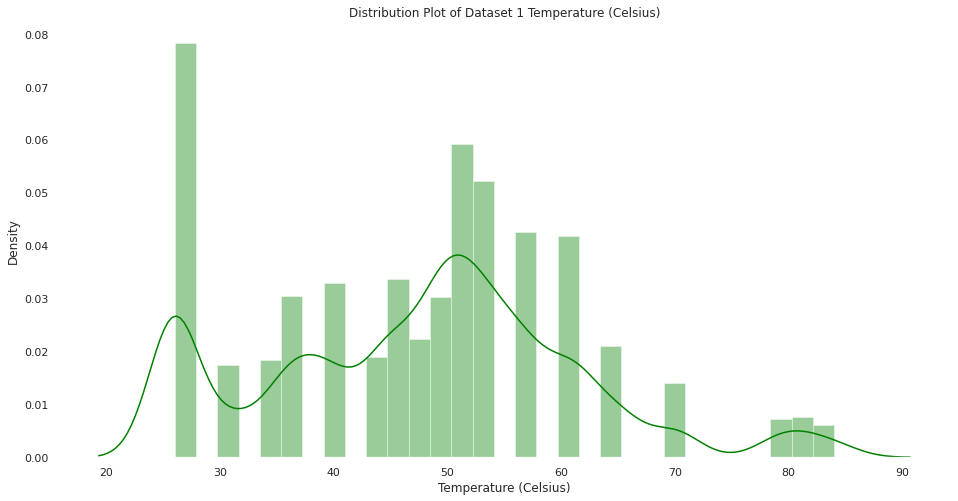

In [8]:
sns.set(rc = {"figure.figsize": (16, 8), 'axes.facecolor': 'white'})
sns.distplot(x = df_1["Temperature (Celsius)"], color = 'Green').set_title("Distribution Plot of Dataset 1 Temperature (Celsius)")
plt.xlabel('Temperature (Celsius)')
plt.show()

**Scatterplot Visualization**

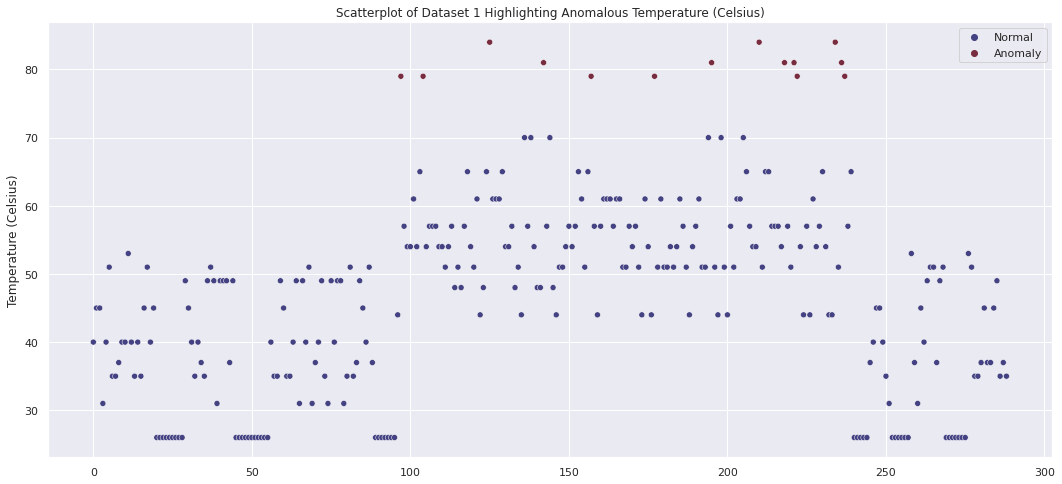

In [9]:
sns.set(rc = {'figure.figsize': (18, 8)})
sns.scatterplot(x = df_1.index,
                y = df_1['Temperature (Celsius)'].loc[0:288],
                hue = df_1['anomaly'],
                palette = "icefire")
plt.title("Scatterplot of Dataset 1 Highlighting Anomalous Temperature (Celsius)")
L = plt.legend(bbox_to_anchor = (1, 1))
L.get_texts()[1].set_text('Anomaly')
L.get_texts()[0].set_text('Normal')
plt.show()

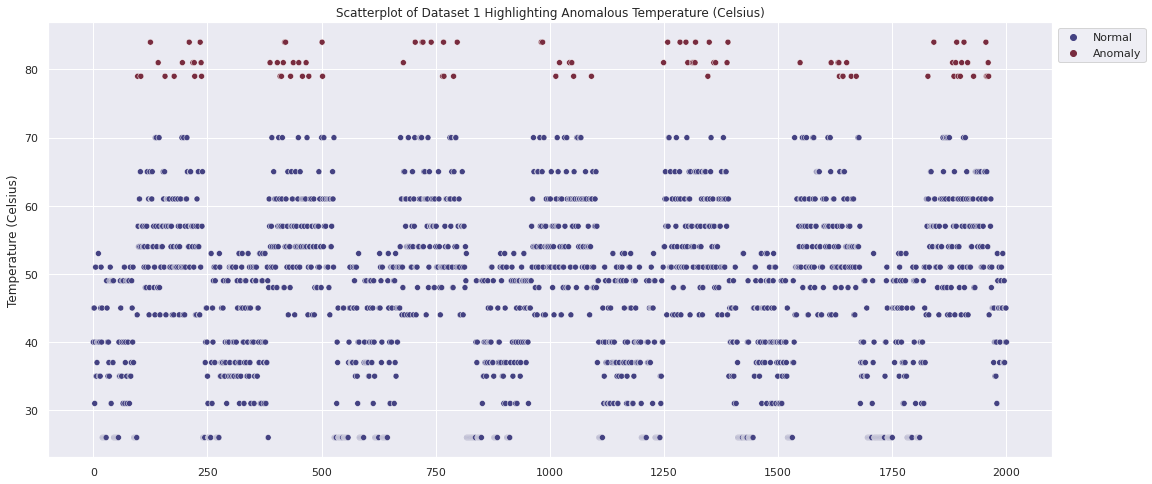

In [10]:
sns.set(rc = {'figure.figsize': (18, 8)})
sns.scatterplot(x = df_1.index,
                y = df_1['Temperature (Celsius)'].loc[0:2000],
                hue = df_1['anomaly'],
                palette = "icefire")
plt.title("Scatterplot of Dataset 1 Highlighting Anomalous Temperature (Celsius)")
L = plt.legend(bbox_to_anchor = (1, 1))
L.get_texts()[1].set_text('Anomaly')
L.get_texts()[0].set_text('Normal')
plt.show()

**Patterns of Failure Analysis**

Number of Anomalies Grouped by Day of Week

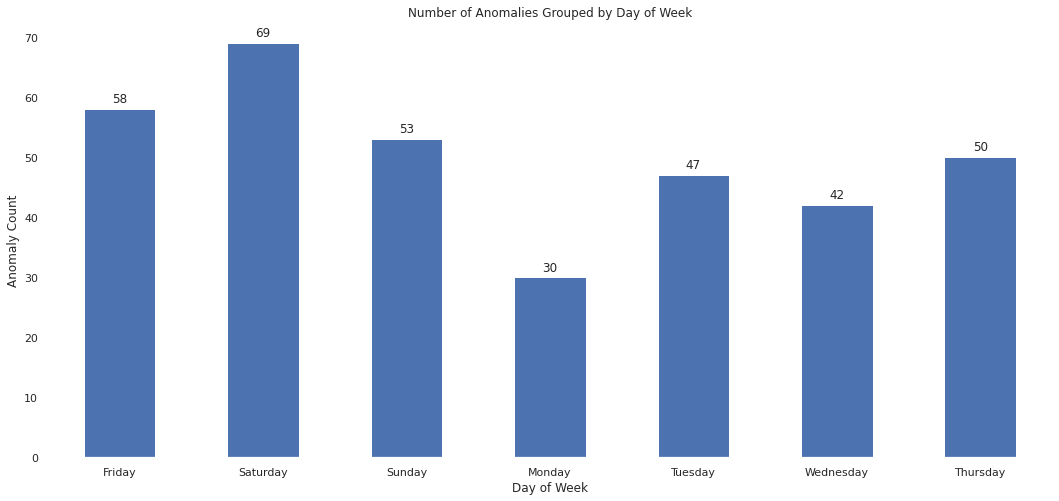

In [11]:
ax = df_1[df_1['anomaly'] == 1].groupby('day_of_week', sort=False)['anomaly'].count().plot(kind='bar', rot=0)
ax.set_facecolor('white')
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
plt.title('Number of Anomalies Grouped by Day of Week')
plt.ylabel('Anomaly Count')
plt.xlabel('Day of Week')
plt.show()

Number of Anomalies Grouped by Hour

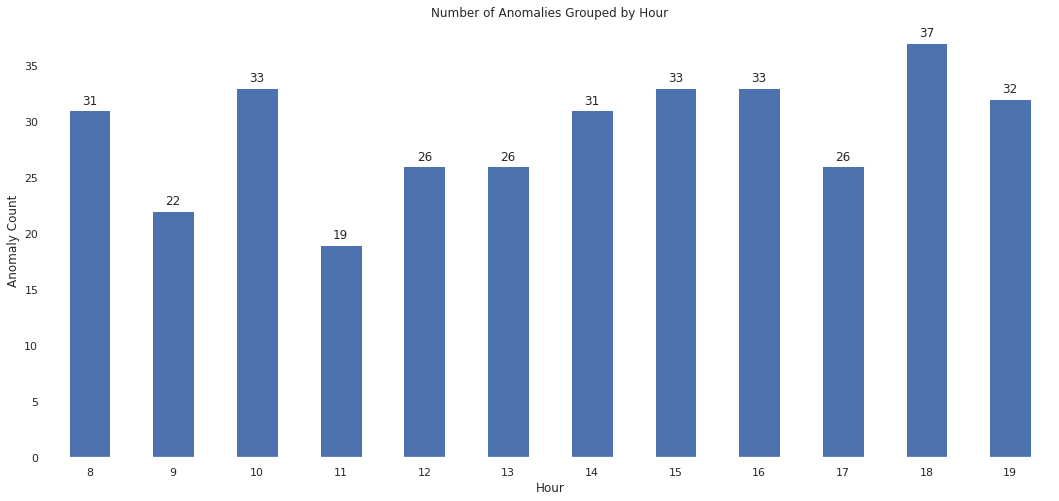

In [12]:
ax = df_1[df_1['anomaly'] == 1].groupby('hour')['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Hour')
plt.ylabel('Anomaly Count')
plt.xlabel('Hour')
plt.show()

Number of Anomalies Grouped by Minute

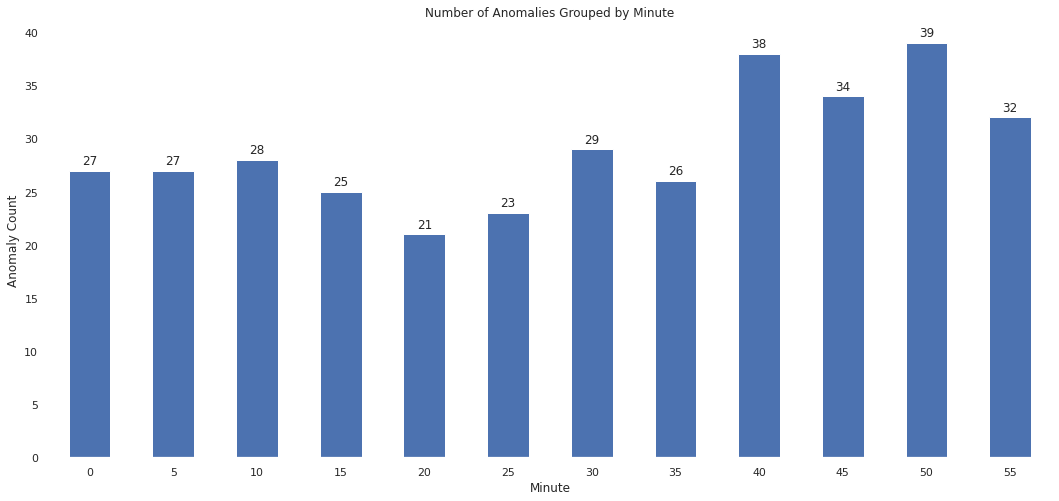

In [13]:
ax = df_1[df_1['anomaly'] == 1].groupby('minute')['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Minute')
plt.ylabel('Anomaly Count')
plt.xlabel('Minute')
plt.show()

## Dataset 2

**Descriptive Statistics**

In [14]:
df_2.describe().iloc[:, 0:3]

,Temperature (Celsius),scores,anomaly
count,8928.000000,8928.000000,8928.000000
mean,47.235215,-0.012148,0.036290
std,13.267318,0.054017,0.187022
min,26.000000,-0.224570,0.000000
25%,37.000000,-0.028480,0.000000
50%,49.000000,-0.001485,0.000000
75%,57.000000,0.023726,0.000000
max,82.000000,0.054149,1.000000


**Distribution Plot**

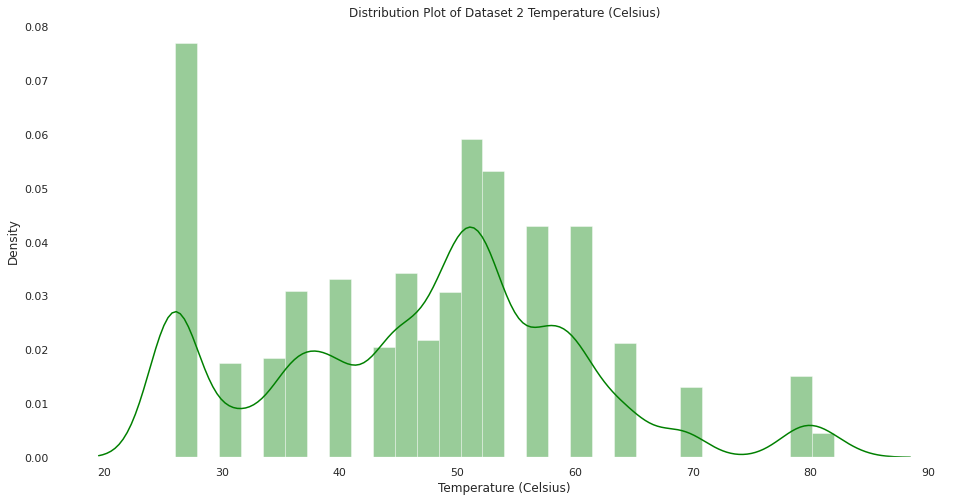

In [15]:
sns.set(rc = {"figure.figsize": (16, 8), 'axes.facecolor': 'white'})
sns.distplot(x = df_2["Temperature (Celsius)"], color = 'Green').set_title("Distribution Plot of Dataset 2 Temperature (Celsius)")
plt.xlabel('Temperature (Celsius)')
plt.show()

**Scatterplot Visualization**

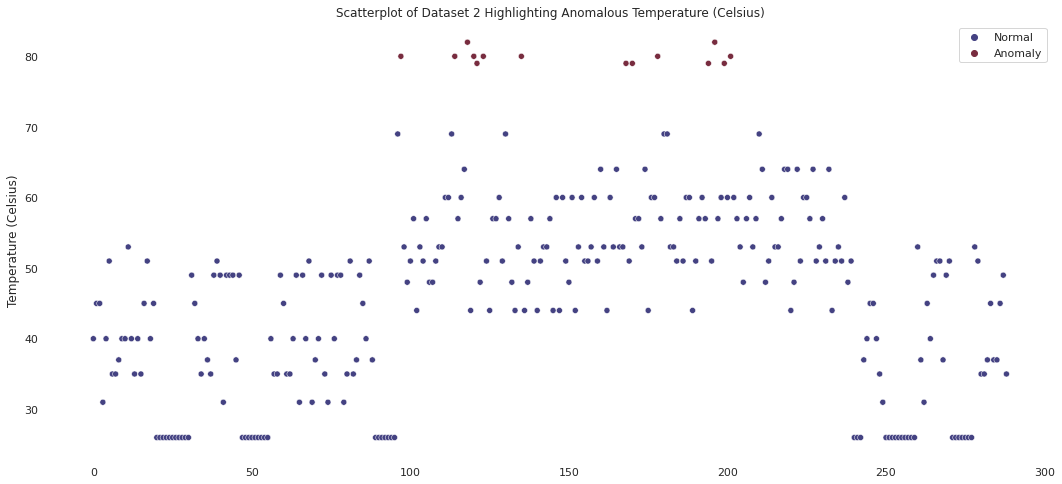

In [16]:
sns.set(rc = {'figure.figsize': (18, 8), 'axes.facecolor': 'white'})
sns.scatterplot(x = df_2.index,
                y = df_2['Temperature (Celsius)'].loc[0:288],
                hue = df_2['anomaly'],
                palette = "icefire")
plt.title("Scatterplot of Dataset 2 Highlighting Anomalous Temperature (Celsius)")
L = plt.legend(bbox_to_anchor = (1, 1))
L.get_texts()[1].set_text('Anomaly')
L.get_texts()[0].set_text('Normal')
plt.show()

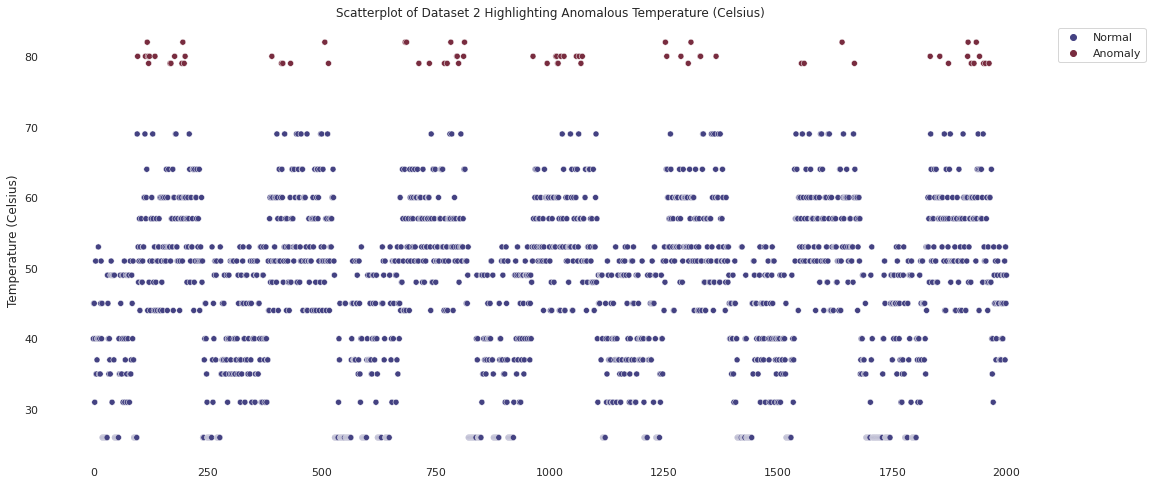

In [17]:
sns.set(rc = {'figure.figsize': (18, 8), 'axes.facecolor': 'white'})
sns.scatterplot(x = df_2.index,
                y = df_2['Temperature (Celsius)'].loc[0:2000],
                hue = df_2['anomaly'],
                palette = "icefire")
plt.title("Scatterplot of Dataset 2 Highlighting Anomalous Temperature (Celsius)")
L = plt.legend(bbox_to_anchor = (1, 1))
L.get_texts()[1].set_text('Anomaly')
L.get_texts()[0].set_text('Normal')
plt.show()

**Patterns of Failure Analysis**

Number of Anomalies Grouped by Day of Week

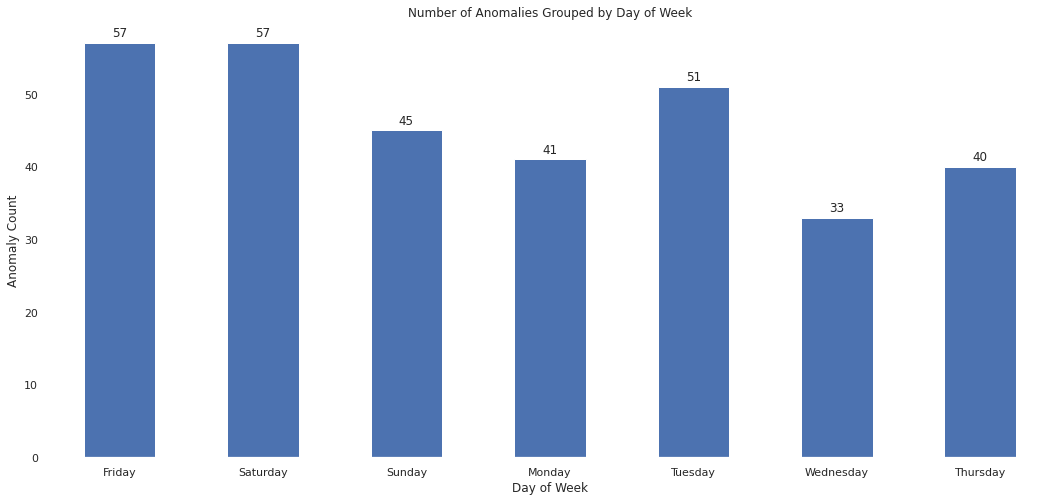

In [18]:
ax = df_2[df_2['anomaly'] == 1].groupby('day_of_week', sort=False)['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Day of Week')
plt.ylabel('Anomaly Count')
plt.xlabel('Day of Week')
plt.show()

Number of Anomalies Grouped by Hour

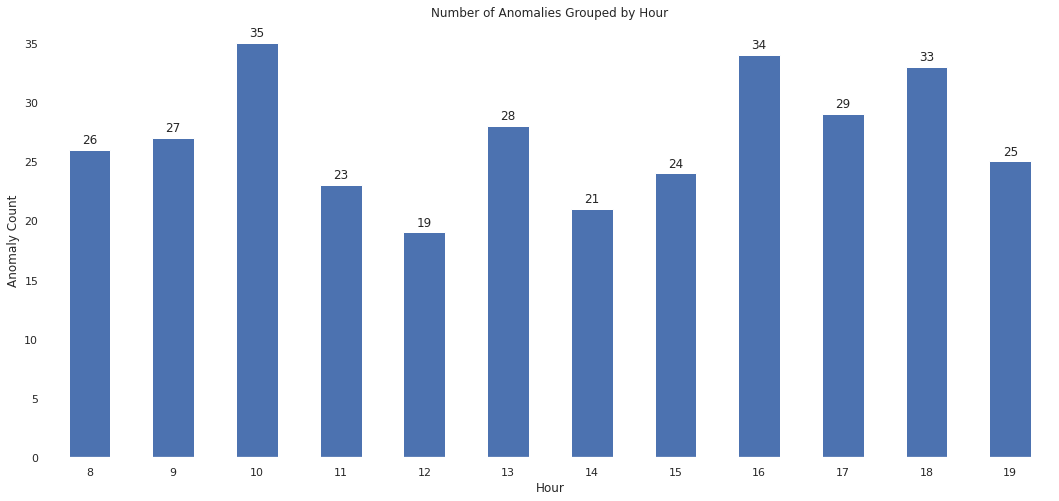

In [19]:
ax = df_2[df_2['anomaly'] == 1].groupby('hour')['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Hour')
plt.ylabel('Anomaly Count')
plt.xlabel('Hour')
plt.show()

Number of Anomalies Grouped by Minute

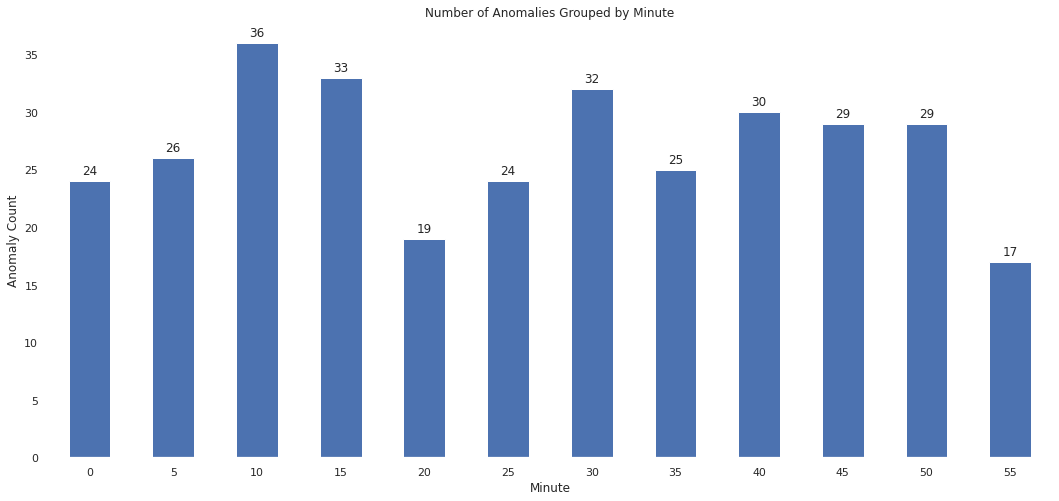

In [20]:
ax = df_2[df_2['anomaly'] == 1].groupby('minute')['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Minute')
plt.ylabel('Anomaly Count')
plt.xlabel('Minute')
plt.show()

## Dataset 3

**Descriptive Statistics**

In [21]:
df_3.describe().iloc[:, 0:3]

,Temperature (Celsius),scores,anomaly
count,8928.000000,8928.000000,8928.000000
mean,47.122984,-0.012074,0.037298
std,13.472287,0.054540,0.189503
min,26.000000,-0.212919,0.000000
25%,37.000000,-0.026800,0.000000
50%,49.000000,-0.009289,0.000000
75%,57.000000,0.020185,0.000000
max,82.000000,0.062311,1.000000


**Distribution Plot**

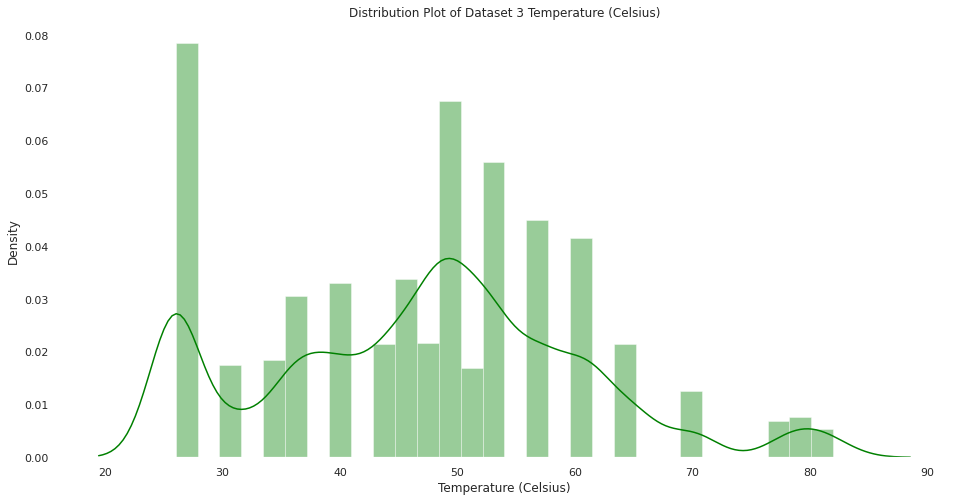

In [22]:
sns.set(rc = {"figure.figsize": (16, 8), 'axes.facecolor': 'white'})
sns.distplot(x = df_3["Temperature (Celsius)"], color = 'Green').set_title("Distribution Plot of Dataset 3 Temperature (Celsius)")
plt.xlabel('Temperature (Celsius)')
plt.show()

**Scatterplot Visualization**

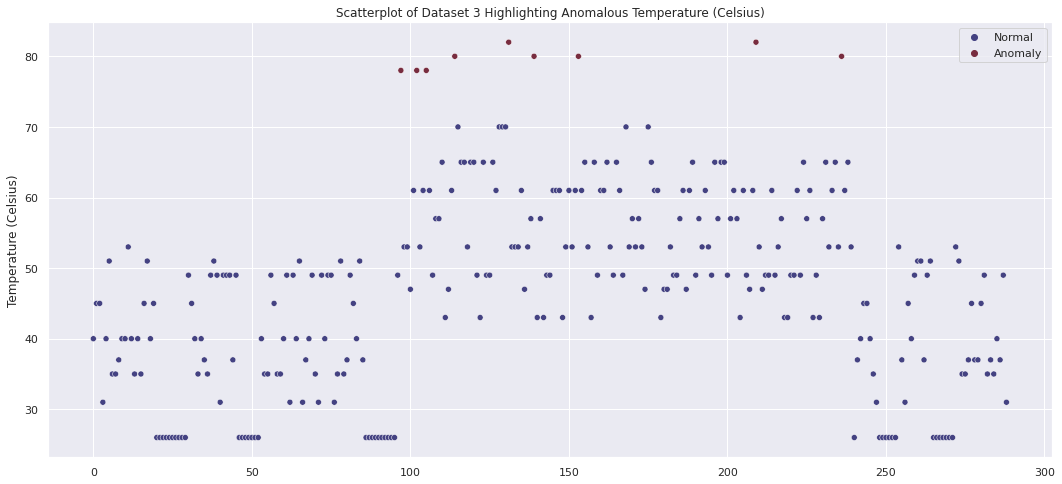

In [23]:
sns.set(rc = {'figure.figsize': (18, 8)})
sns.scatterplot(x = df_3.index,
                y = df_3['Temperature (Celsius)'].loc[0:288],
                hue = df_3['anomaly'],
                palette = "icefire")
plt.title("Scatterplot of Dataset 3 Highlighting Anomalous Temperature (Celsius)")
L = plt.legend(bbox_to_anchor = (1, 1))
L.get_texts()[1].set_text('Anomaly')
L.get_texts()[0].set_text('Normal')
plt.show()

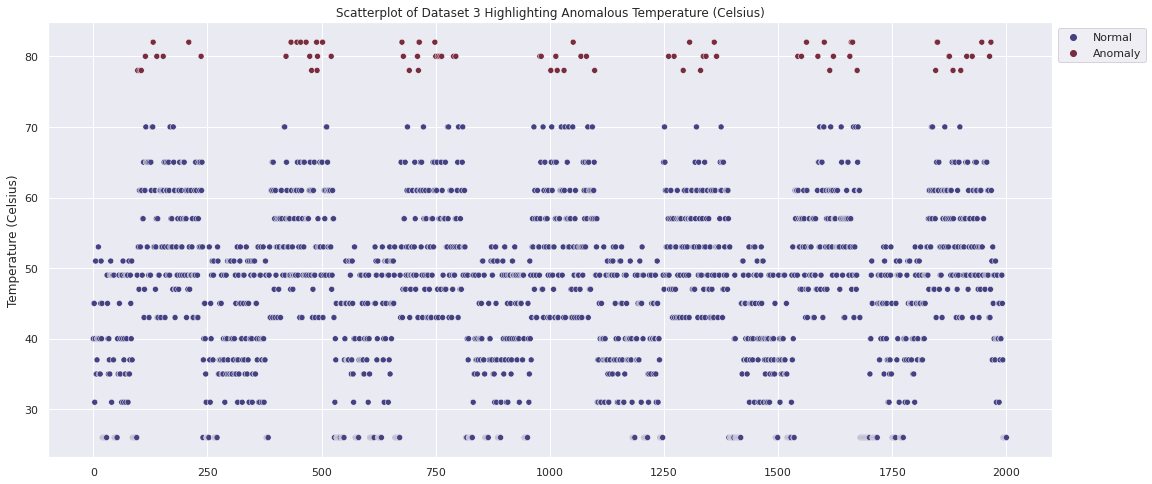

In [24]:
sns.set(rc = {'figure.figsize': (18, 8)})
sns.scatterplot(x = df_3.index,
                y = df_3['Temperature (Celsius)'].loc[0:2000],
                hue = df_3['anomaly'],
                palette = "icefire")
plt.title("Scatterplot of Dataset 3 Highlighting Anomalous Temperature (Celsius)")
L = plt.legend(bbox_to_anchor = (1, 1))
L.get_texts()[1].set_text('Anomaly')
L.get_texts()[0].set_text('Normal')
plt.show()

**Patterns of Failure Analysis**

Number of Anomalies Grouped by Day of Week

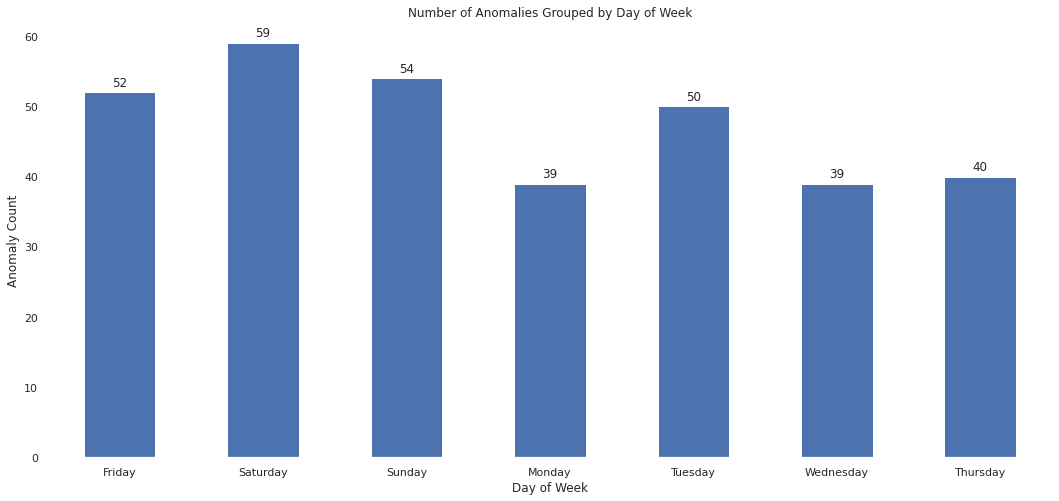

In [25]:
ax = df_3[df_3['anomaly'] == 1].groupby('day_of_week', sort=False)['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Day of Week')
plt.ylabel('Anomaly Count')
plt.xlabel('Day of Week')
plt.show()

Number of Anomalies Grouped by Hour

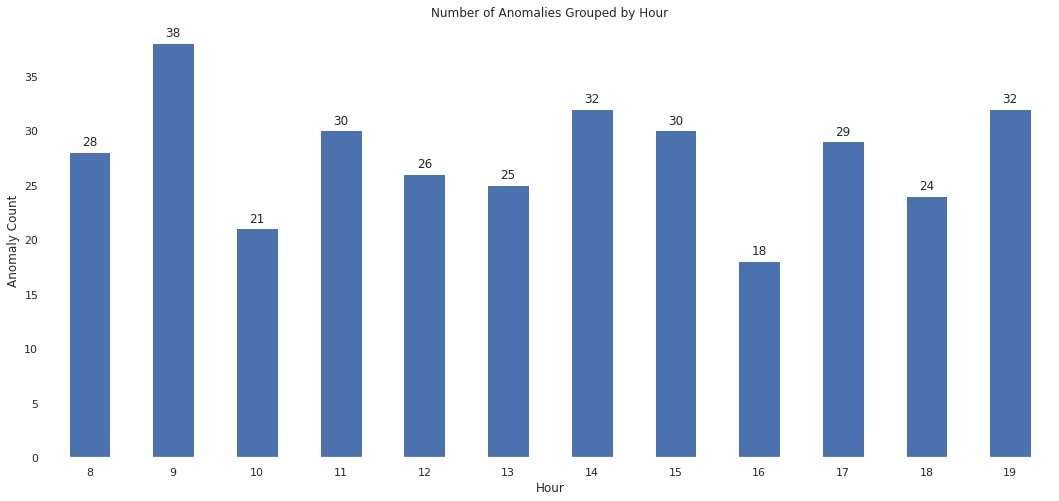

In [26]:
ax = df_3[df_3['anomaly'] == 1].groupby('hour')['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Hour')
plt.ylabel('Anomaly Count')
plt.xlabel('Hour')
plt.show()

Number of Anomalies Grouped by Minute

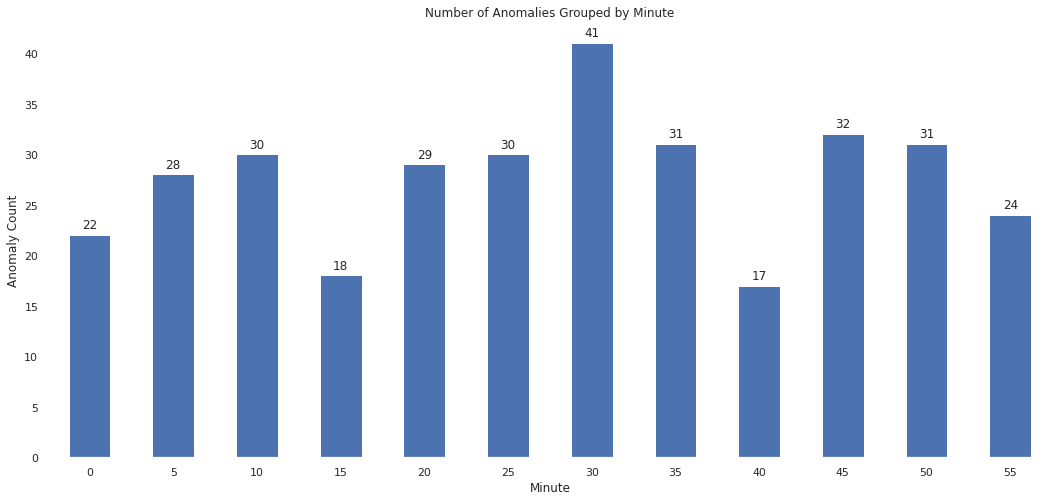

In [27]:
ax = df_3[df_3['anomaly'] == 1].groupby('minute')['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Minute')
plt.ylabel('Anomaly Count')
plt.xlabel('Minute')
plt.show()

## Dataset 4

**Descriptive Statistics**

In [28]:
df_4.describe().iloc[:, 0:3]

,Temperature (Celsius),scores,anomaly
count,8928.000000,8928.000000,8928.000000
mean,46.197245,-0.009569,0.008513
std,12.294433,0.051566,0.091875
min,26.000000,-0.255248,0.000000
25%,37.000000,-0.029885,0.000000
50%,49.000000,-0.009178,0.000000
75%,53.000000,0.014989,0.000000
max,79.000000,0.068294,1.000000


**Distribution Plot**

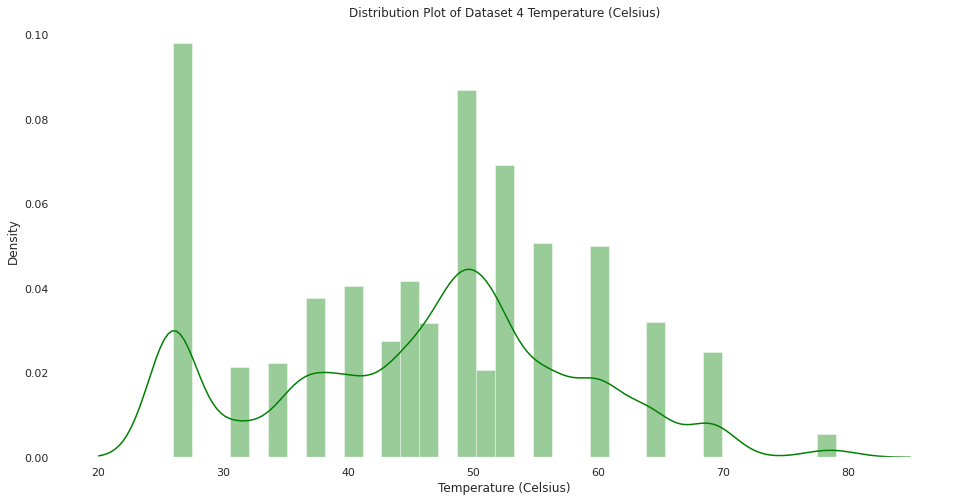

In [29]:
sns.set(rc = {"figure.figsize": (16, 8), 'axes.facecolor': 'white'})
sns.distplot(x = df_4["Temperature (Celsius)"], color = 'Green').set_title("Distribution Plot of Dataset 4 Temperature (Celsius)")
plt.xlabel('Temperature (Celsius)')
plt.show()

**Scatterplot Visualization**

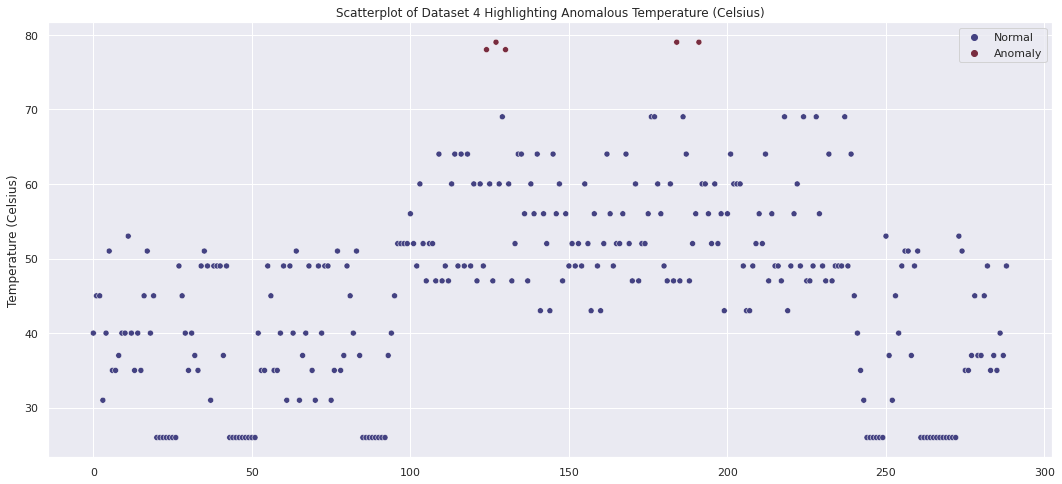

In [30]:
sns.set(rc = {'figure.figsize': (18, 8)})
sns.scatterplot(x = df_4.index,
                y = df_4['Temperature (Celsius)'].loc[0:288],
                hue = df_4['anomaly'],
                palette = "icefire")
plt.title("Scatterplot of Dataset 4 Highlighting Anomalous Temperature (Celsius)")
L = plt.legend(bbox_to_anchor = (1, 1))
L.get_texts()[1].set_text('Anomaly')
L.get_texts()[0].set_text('Normal')
plt.show()

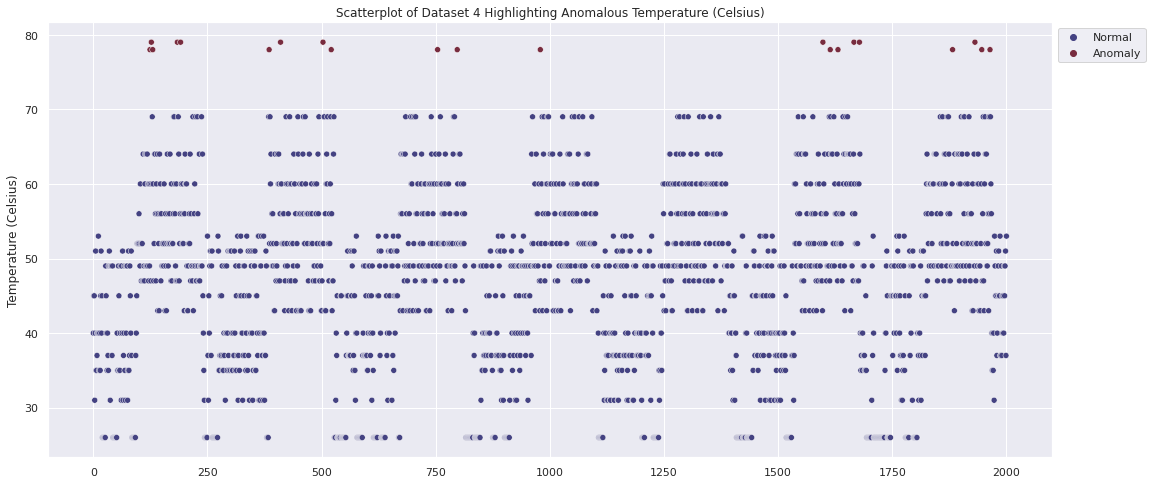

In [31]:
sns.set(rc = {'figure.figsize': (18, 8)})
sns.scatterplot(x = df_4.index,
                y = df_4['Temperature (Celsius)'].loc[0:2000],
                hue = df_4['anomaly'],
                palette = "icefire")
plt.title("Scatterplot of Dataset 4 Highlighting Anomalous Temperature (Celsius)")
L = plt.legend(bbox_to_anchor = (1, 1))
L.get_texts()[1].set_text('Anomaly')
L.get_texts()[0].set_text('Normal')
plt.show()

**Patterns of Failure Analysis**

Number of Anomalies Grouped by Day of Week

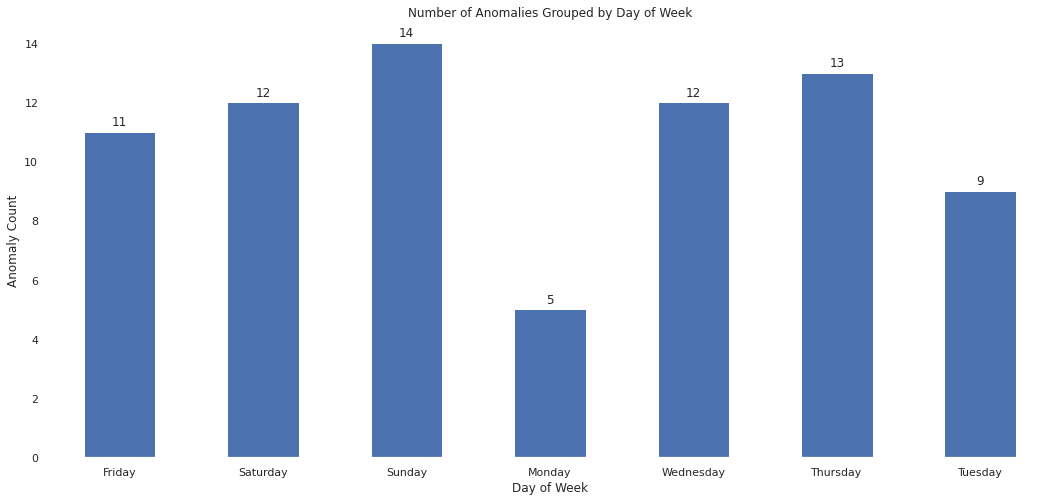

In [32]:
ax = df_4[df_4['anomaly'] == 1].groupby('day_of_week', sort=False)['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Day of Week')
plt.ylabel('Anomaly Count')
plt.xlabel('Day of Week')
plt.show()

Number of Anomalies Grouped by Hour

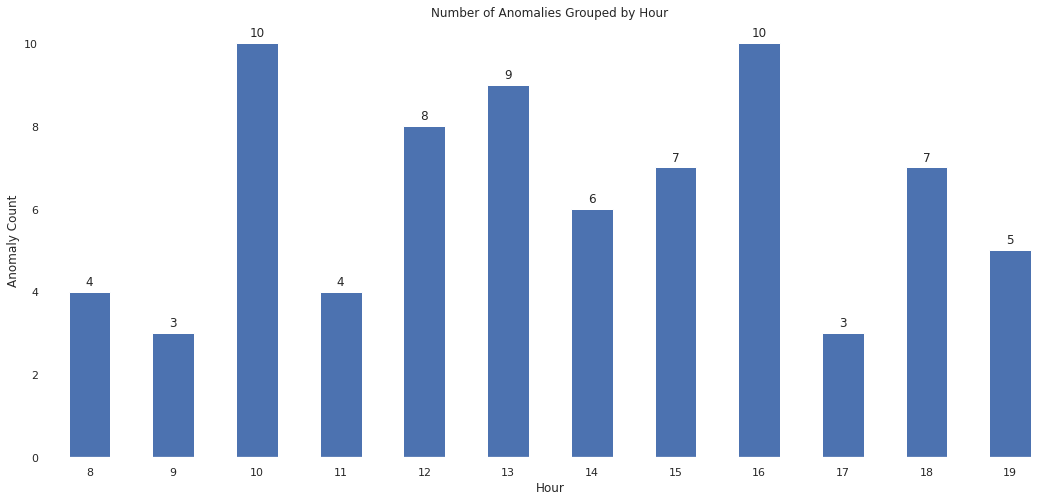

In [33]:
ax = df_4[df_4['anomaly'] == 1].groupby('hour')['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Hour')
plt.ylabel('Anomaly Count')
plt.xlabel('Hour')
plt.show()

Number of Anomalies Grouped by Minute

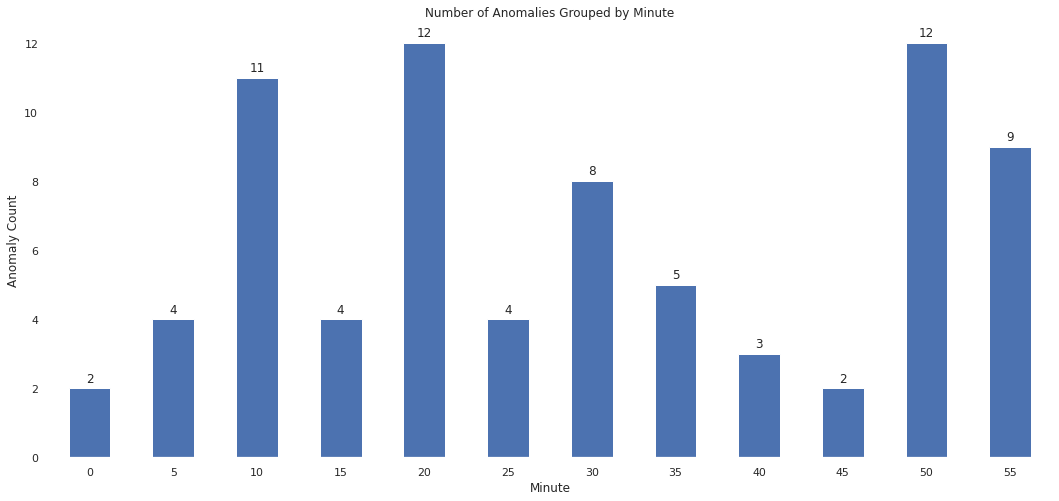

In [34]:
ax = df_4[df_4['anomaly'] == 1].groupby('minute')['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Minute')
plt.ylabel('Anomaly Count')
plt.xlabel('Minute')
plt.show()

## Dataset 5

**Descriptive Statistics**

In [35]:
df_5.describe().iloc[:, 0:3]

,Temperature (Celsius),scores,anomaly
count,8928.000000,8928.000000,8928.000000
mean,46.136873,-0.009087,0.010641
std,12.088147,0.050589,0.102609
min,26.000000,-0.268996,0.000000
25%,37.000000,-0.031148,0.000000
50%,49.000000,-0.003707,0.000000
75%,56.000000,0.016545,0.000000
max,79.000000,0.057638,1.000000


**Distribution Plot**

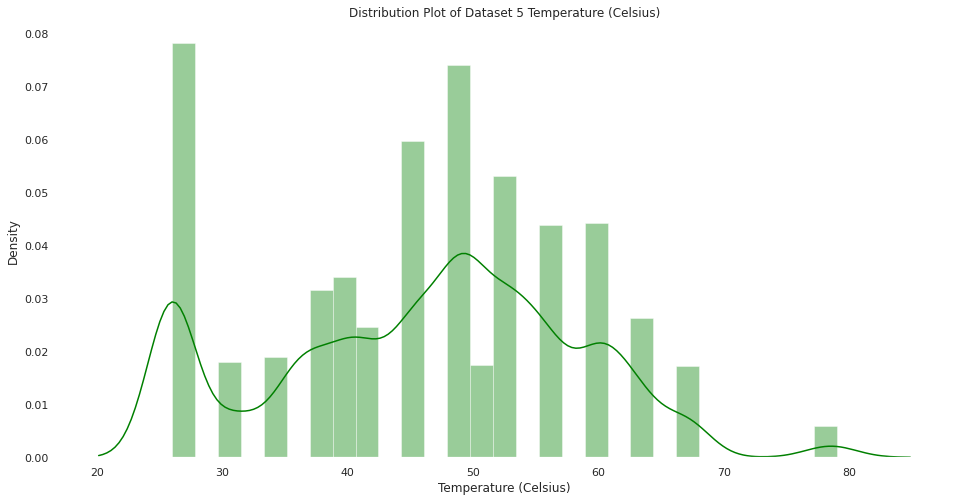

In [36]:
sns.set(rc = {"figure.figsize": (16, 8), 'axes.facecolor': 'white'})
sns.distplot(x = df_5["Temperature (Celsius)"], color = 'Green').set_title("Distribution Plot of Dataset 5 Temperature (Celsius)")
plt.xlabel('Temperature (Celsius)')
plt.show()

**Scatterplot Visualization**

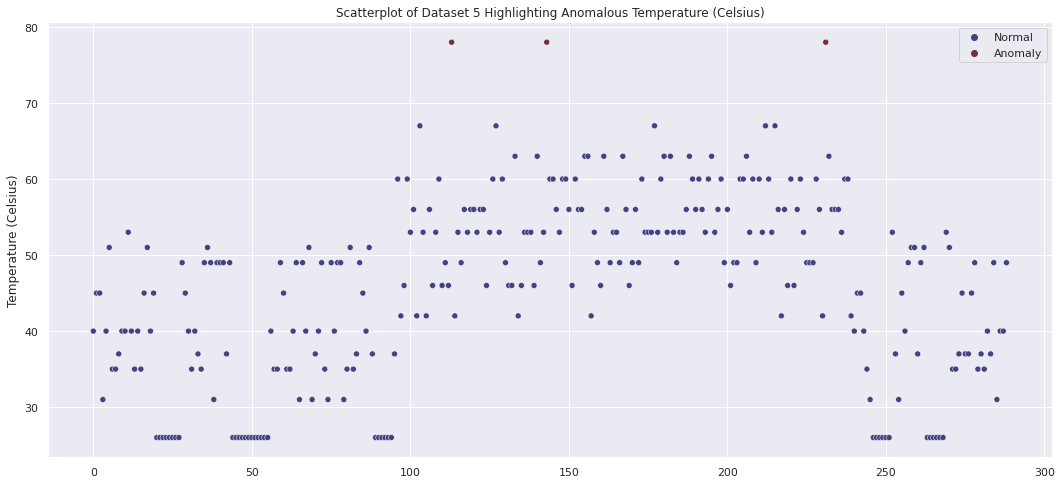

In [37]:
sns.set(rc = {'figure.figsize': (18, 8)})
sns.scatterplot(x = df_5.index,
                y = df_5['Temperature (Celsius)'].loc[0:288],
                hue = df_5['anomaly'],
                palette = "icefire")
plt.title("Scatterplot of Dataset 5 Highlighting Anomalous Temperature (Celsius)")
L = plt.legend(bbox_to_anchor = (1, 1))
L.get_texts()[1].set_text('Anomaly')
L.get_texts()[0].set_text('Normal')
plt.show()

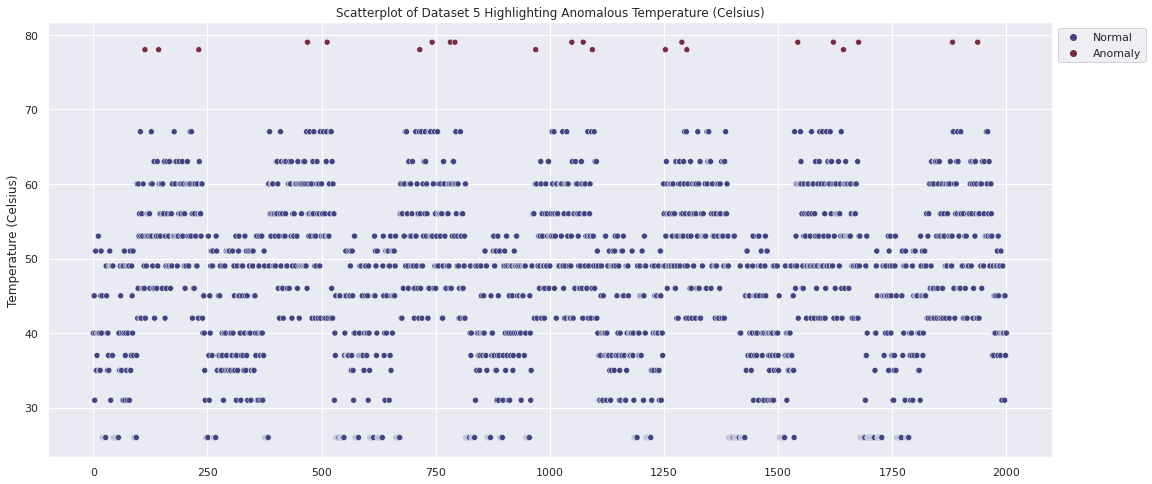

In [38]:
sns.set(rc = {'figure.figsize': (18, 8)})
sns.scatterplot(x = df_5.index,
                y = df_5['Temperature (Celsius)'].loc[0:2000],
                hue = df_5['anomaly'],
                palette = "icefire")
plt.title("Scatterplot of Dataset 5 Highlighting Anomalous Temperature (Celsius)")
L = plt.legend(bbox_to_anchor = (1, 1))
L.get_texts()[1].set_text('Anomaly')
L.get_texts()[0].set_text('Normal')
plt.show()

**Patterns of Failure Analysis**

Number of Anomalies Grouped by Day of Week

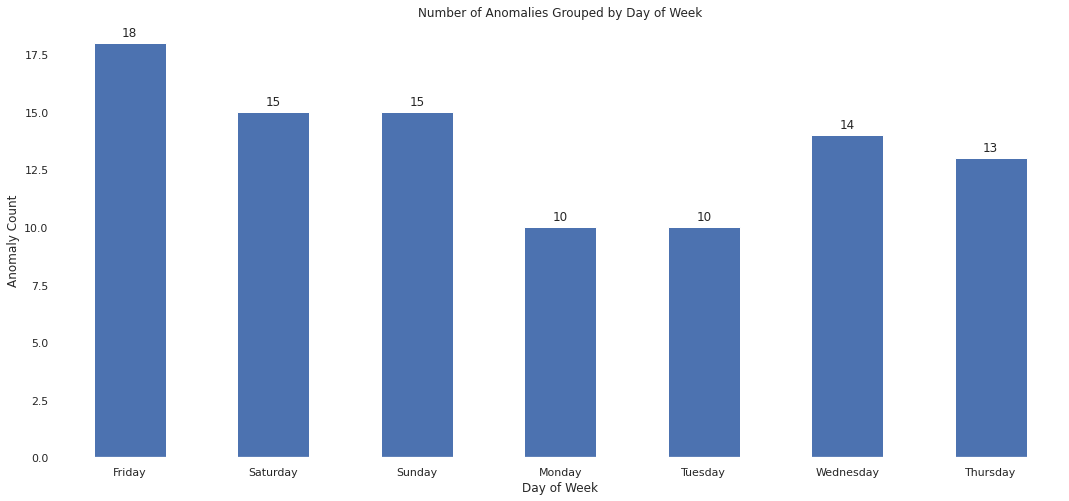

In [39]:
ax = df_5[df_5['anomaly'] == 1].groupby('day_of_week', sort=False)['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Day of Week')
plt.ylabel('Anomaly Count')
plt.xlabel('Day of Week')
plt.show()

Number of Anomalies Grouped by Hour

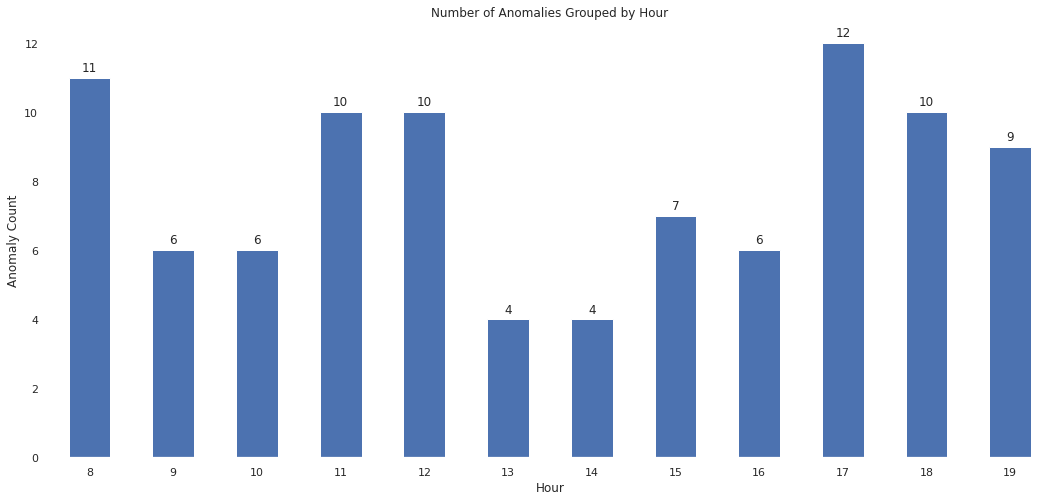

In [40]:
ax = df_5[df_5['anomaly'] == 1].groupby('hour')['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Hour')
plt.ylabel('Anomaly Count')
plt.xlabel('Hour')
plt.show()

Number of Anomalies Grouped by Minute

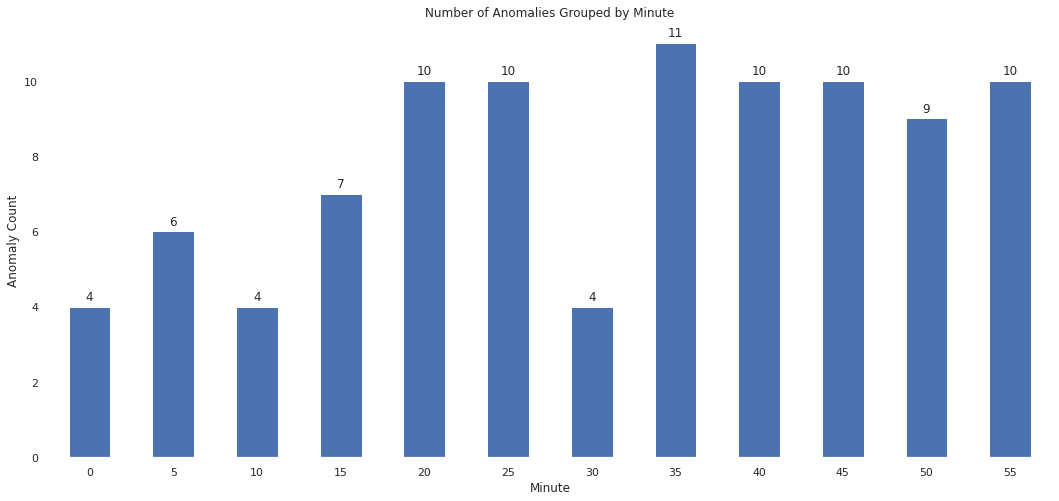

In [41]:
ax = df_5[df_5['anomaly'] == 1].groupby('minute')['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Minute')
plt.ylabel('Anomaly Count')
plt.xlabel('Minute')
plt.show()

## Dataset 6

**Descriptive Statistics**

In [42]:
df_6.describe().iloc[:, 0:3]

,Temperature (Celsius),scores,anomaly
count,8928.000000,8928.000000,8928.000000
mean,45.831877,-0.008546,0.009409
std,11.912740,0.052181,0.096546
min,26.000000,-0.266663,0.000000
25%,37.000000,-0.031077,0.000000
50%,49.000000,-0.007530,0.000000
75%,55.000000,0.013657,0.000000
max,78.000000,0.054557,1.000000


**Distribution Plot**

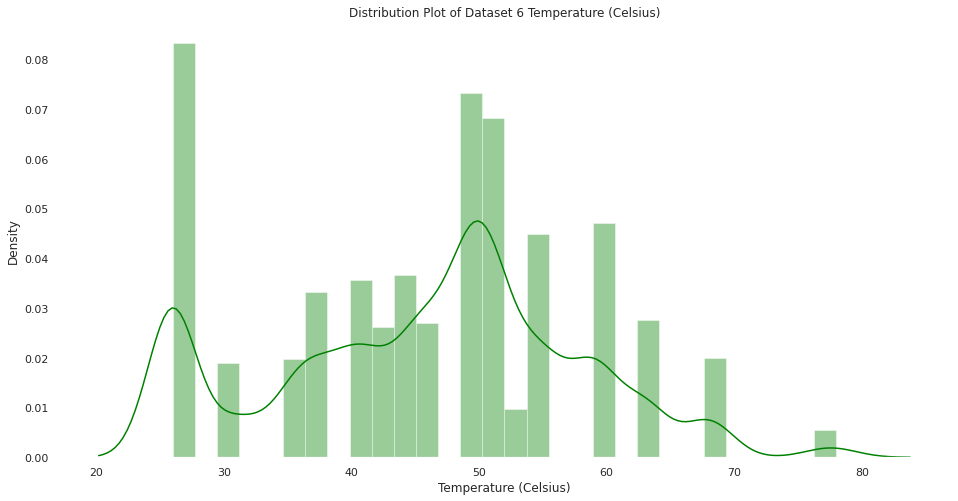

In [43]:
sns.set(rc = {"figure.figsize": (16, 8), 'axes.facecolor': 'white'})
sns.distplot(x = df_6["Temperature (Celsius)"], color = 'Green').set_title("Distribution Plot of Dataset 6 Temperature (Celsius)")
plt.xlabel('Temperature (Celsius)')
plt.show()

**Scatterplot Visualization**

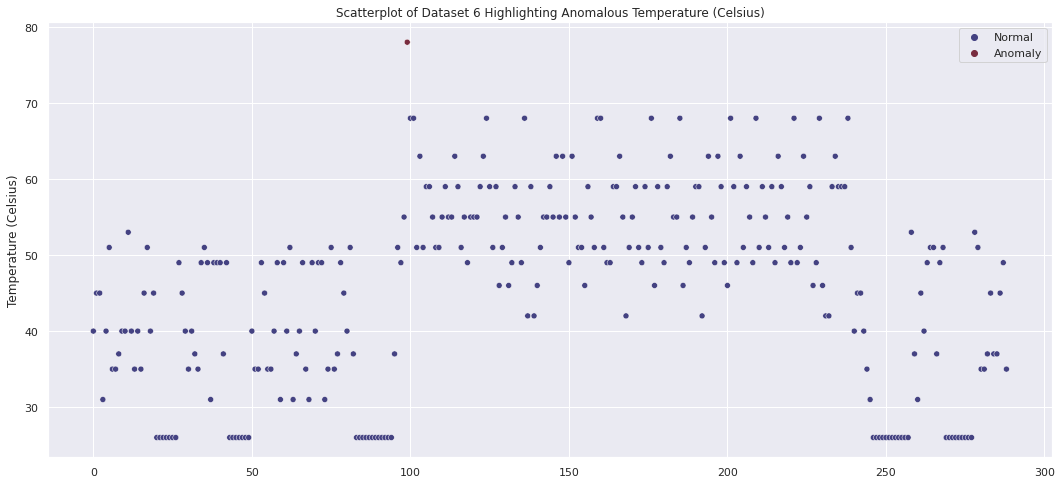

In [44]:
sns.set(rc = {'figure.figsize': (18, 8)})
sns.scatterplot(x = df_6.index,
                y = df_6['Temperature (Celsius)'].loc[0:288],
                hue = df_6['anomaly'],
                palette = "icefire")
plt.title("Scatterplot of Dataset 6 Highlighting Anomalous Temperature (Celsius)")
L = plt.legend(bbox_to_anchor = (1, 1))
L.get_texts()[1].set_text('Anomaly')
L.get_texts()[0].set_text('Normal')
plt.show()

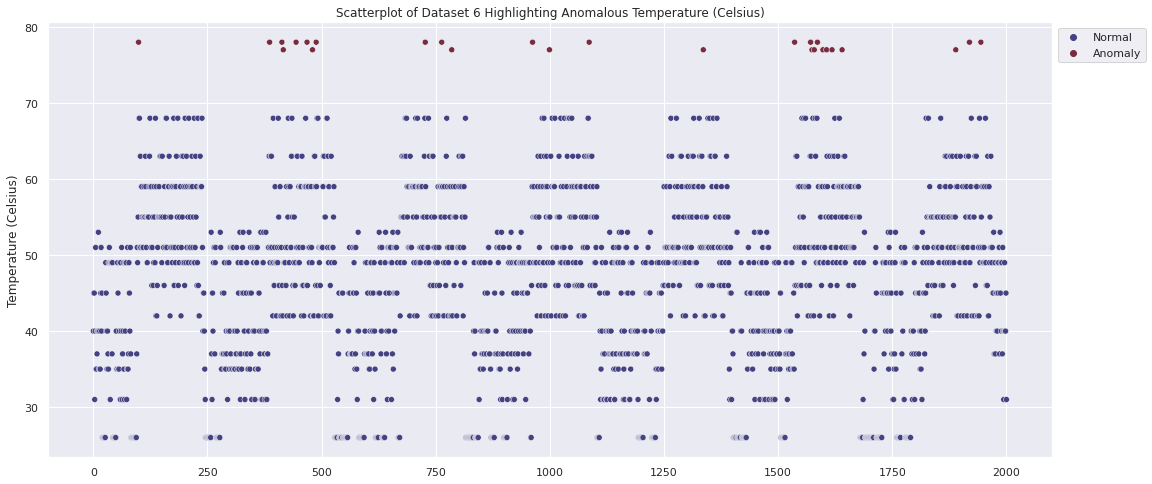

In [45]:
sns.set(rc = {'figure.figsize': (18, 8)})
sns.scatterplot(x = df_6.index,
                y = df_6['Temperature (Celsius)'].loc[0:2000],
                hue = df_6['anomaly'],
                palette = "icefire")
plt.title("Scatterplot of Dataset 6 Highlighting Anomalous Temperature (Celsius)")
L = plt.legend(bbox_to_anchor = (1, 1))
L.get_texts()[1].set_text('Anomaly')
L.get_texts()[0].set_text('Normal')
plt.show()

**Patterns of Failure Analysis**

Number of Anomalies Grouped by Day of Week

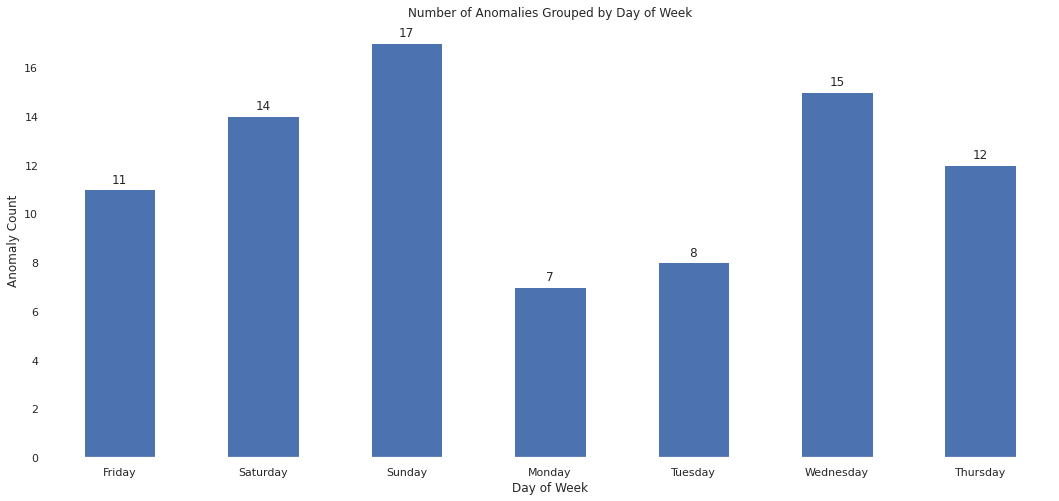

In [46]:
ax = df_6[df_6['anomaly'] == 1].groupby('day_of_week', sort=False)['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Day of Week')
plt.ylabel('Anomaly Count')
plt.xlabel('Day of Week')
plt.show()

Number of Anomalies Grouped by Hour

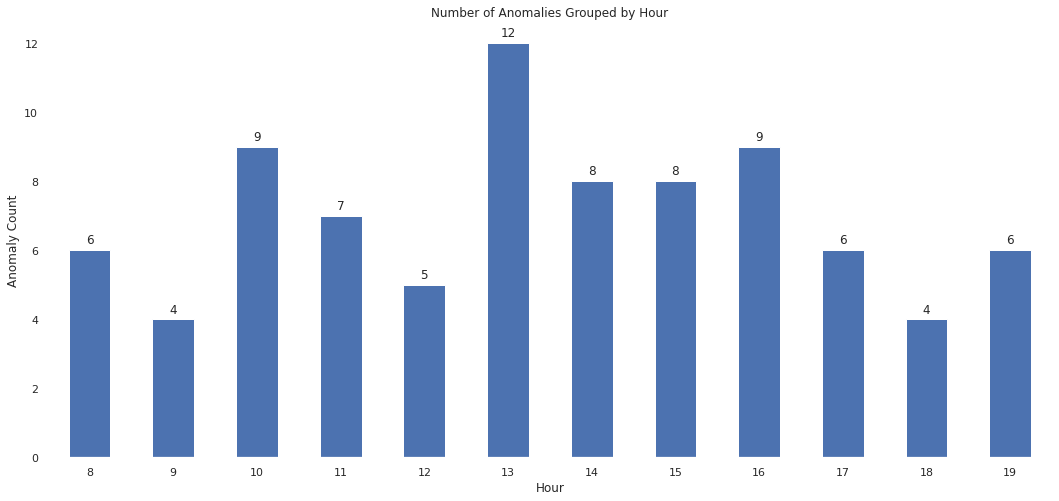

In [47]:
ax = df_6[df_6['anomaly'] == 1].groupby('hour')['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Hour')
plt.ylabel('Anomaly Count')
plt.xlabel('Hour')
plt.show()

Number of Anomalies Grouped by Minute

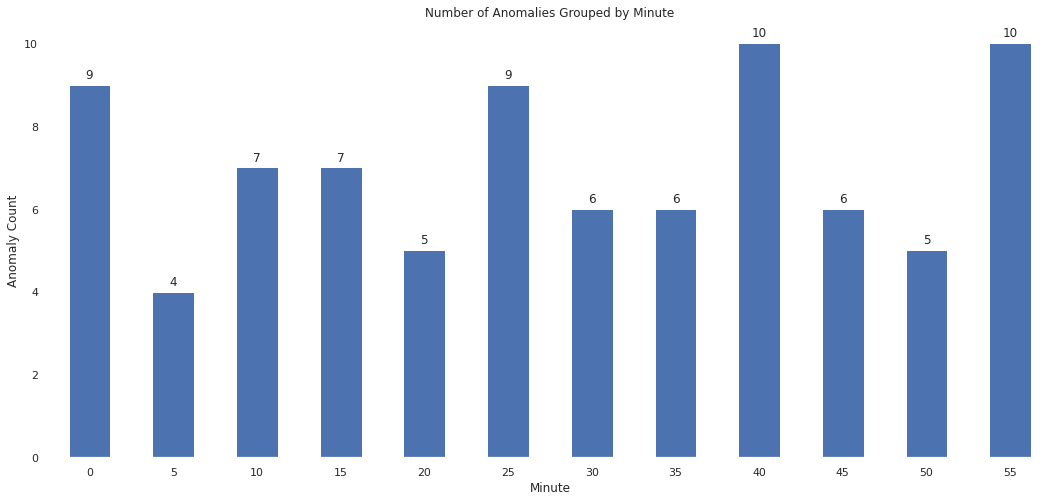

In [48]:
ax = df_6[df_6['anomaly'] == 1].groupby('minute')['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Minute')
plt.ylabel('Anomaly Count')
plt.xlabel('Minute')
plt.show()

## Dataset 7

**Descriptive Statistics**

In [49]:
df_7.describe().iloc[:, 0:3]

,Temperature (Celsius),scores,anomaly
count,8928.000000,8928.000000,8928.000000
mean,45.450941,-0.008452,0.011425
std,11.726154,0.051937,0.106280
min,26.000000,-0.272560,0.000000
25%,37.000000,-0.029269,0.000000
50%,48.000000,-0.005124,0.000000
75%,54.000000,0.026151,0.000000
max,78.000000,0.054907,1.000000


**Distribution Plot**

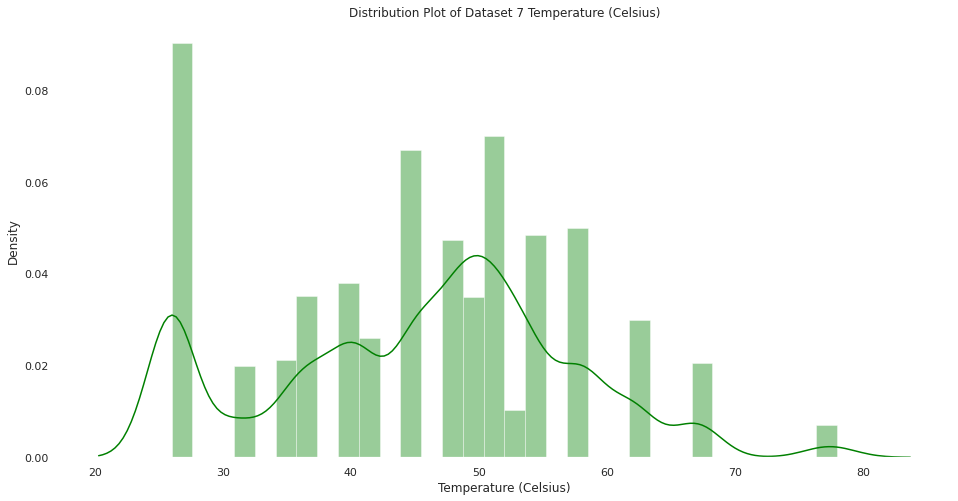

In [50]:
sns.set(rc = {"figure.figsize": (16, 8), 'axes.facecolor': 'white'})
sns.distplot(x = df_7["Temperature (Celsius)"], color = 'Green').set_title("Distribution Plot of Dataset 7 Temperature (Celsius)")
plt.xlabel('Temperature (Celsius)')
plt.show()

**Scatterplot Visualization**

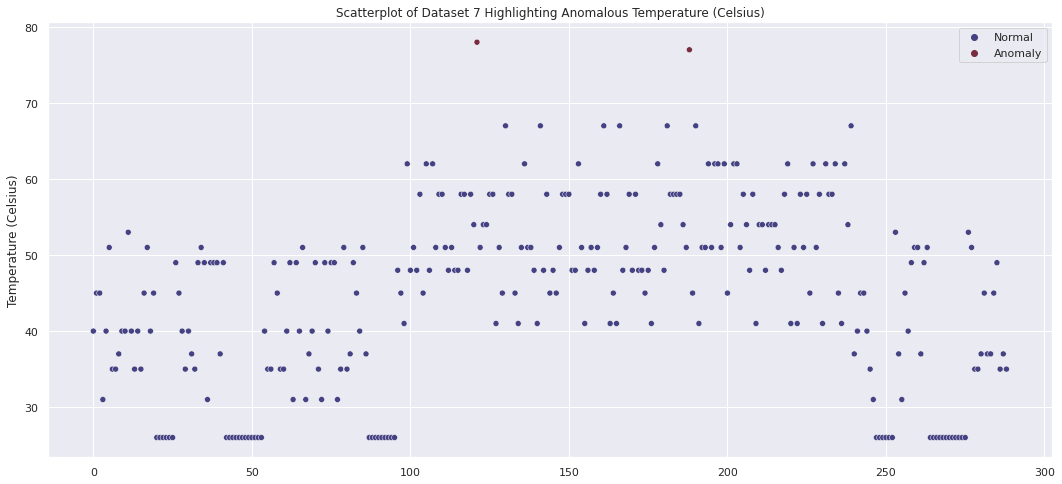

In [51]:
sns.set(rc = {'figure.figsize': (18, 8)})
sns.scatterplot(x = df_7.index,
                y = df_7['Temperature (Celsius)'].loc[0:288],
                hue = df_7['anomaly'],
                palette = "icefire")
plt.title("Scatterplot of Dataset 7 Highlighting Anomalous Temperature (Celsius)")
L = plt.legend(bbox_to_anchor = (1, 1))
L.get_texts()[1].set_text('Anomaly')
L.get_texts()[0].set_text('Normal')
plt.show()

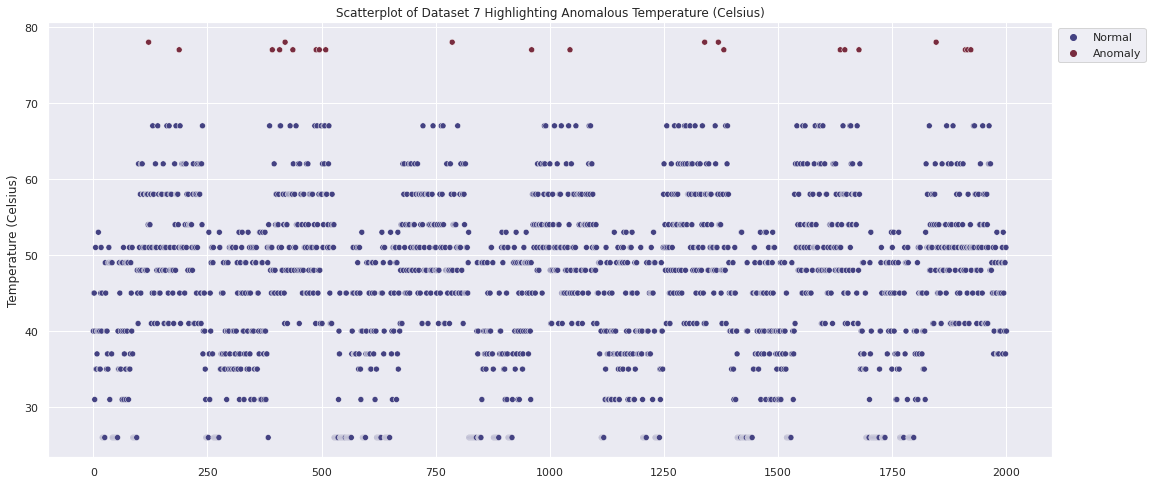

In [52]:
sns.set(rc = {'figure.figsize': (18, 8)})
sns.scatterplot(x = df_7.index,
                y = df_7['Temperature (Celsius)'].loc[0:2000],
                hue = df_7['anomaly'],
                palette = "icefire")
plt.title("Scatterplot of Dataset 7 Highlighting Anomalous Temperature (Celsius)")
L = plt.legend(bbox_to_anchor = (1, 1))
L.get_texts()[1].set_text('Anomaly')
L.get_texts()[0].set_text('Normal')
plt.show()

**Patterns of Failure Analysis**

Number of Anomalies Grouped by Day of Week

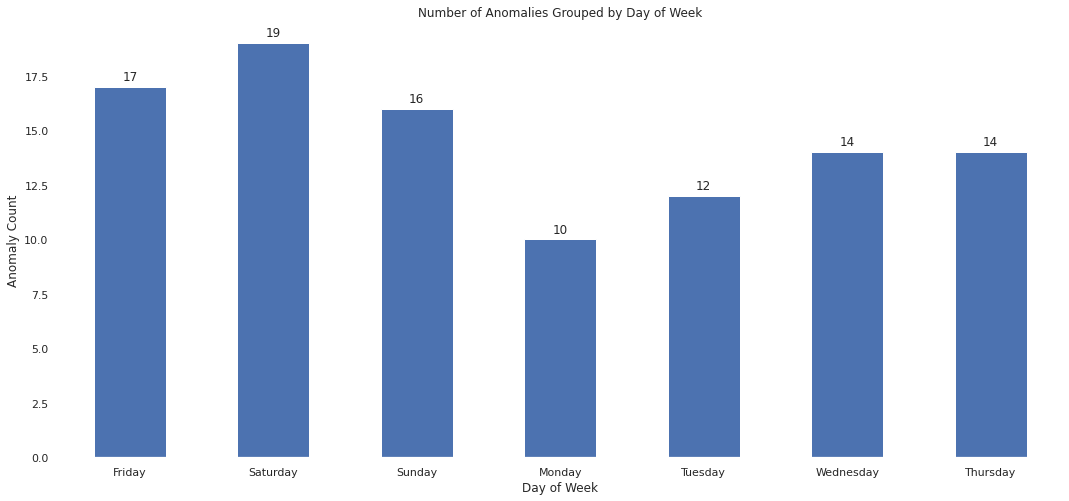

In [53]:
ax = df_7[df_7['anomaly'] == 1].groupby('day_of_week', sort=False)['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Day of Week')
plt.ylabel('Anomaly Count')
plt.xlabel('Day of Week')
plt.show()

Number of Anomalies Grouped by Hour

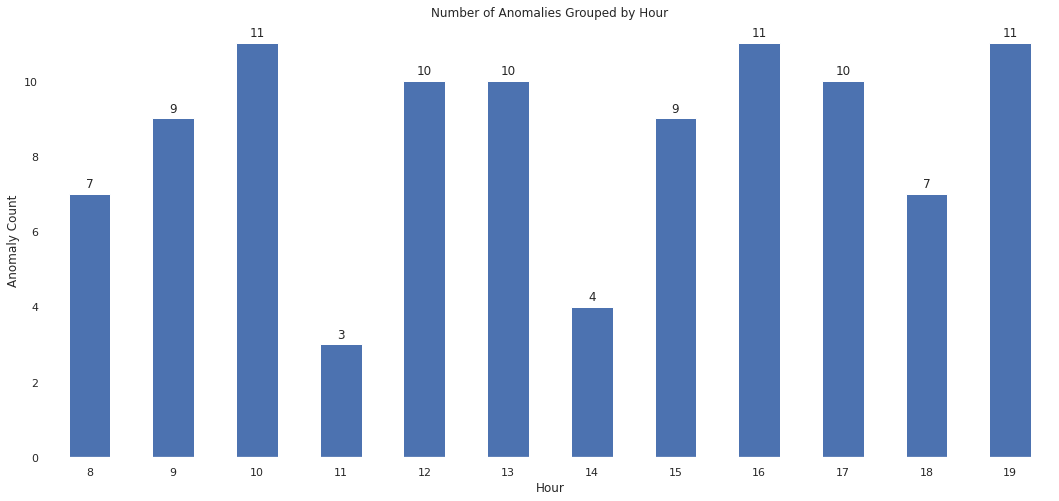

In [54]:
ax = df_7[df_7['anomaly'] == 1].groupby('hour')['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Hour')
plt.ylabel('Anomaly Count')
plt.xlabel('Hour')
plt.show()

Number of Anomalies Grouped by Minute

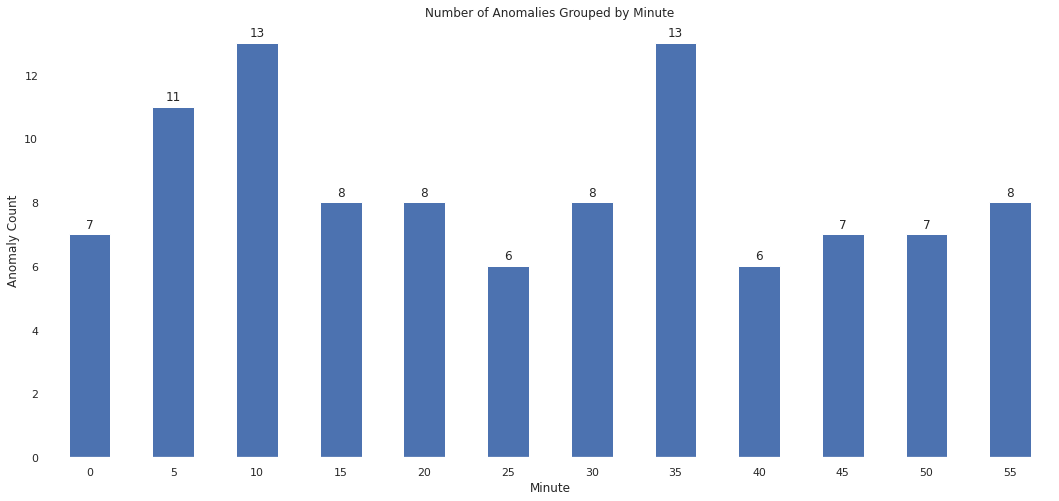

In [55]:
ax = df_7[df_7['anomaly'] == 1].groupby('minute')['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Minute')
plt.ylabel('Anomaly Count')
plt.xlabel('Minute')
plt.show()

## Dataset 8

**Descriptive Statistics**

In [56]:
df_8.describe().iloc[:, 0:3]

,Temperature (Celsius),scores,anomaly
count,8928.000000,8928.000000,8928.000000
mean,45.203293,-0.008823,0.008513
std,11.459017,0.049323,0.091875
min,26.000000,-0.267105,0.000000
25%,37.000000,-0.030652,0.000000
50%,48.000000,-0.005114,0.000000
75%,53.000000,0.025589,0.000000
max,78.000000,0.045080,1.000000


**Distribution Plot**

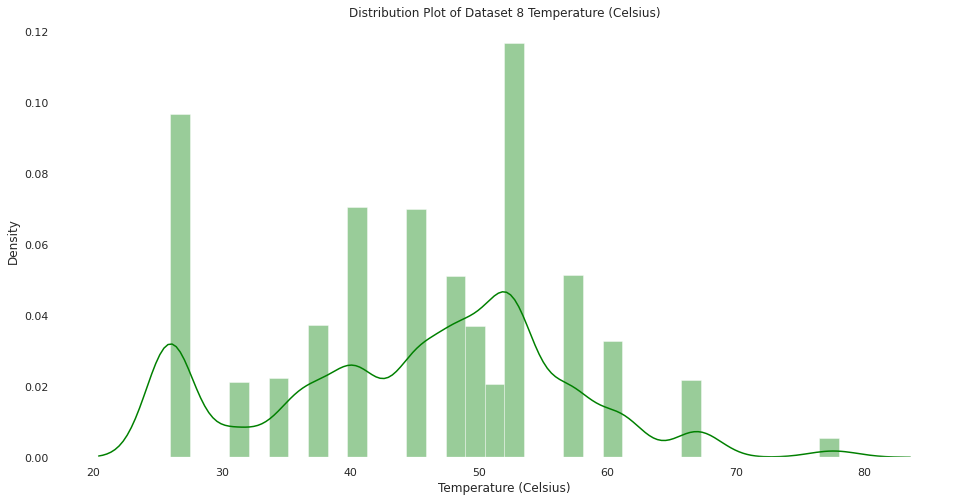

In [57]:
sns.set(rc = {"figure.figsize": (16, 8), 'axes.facecolor': 'white'})
sns.distplot(x = df_8["Temperature (Celsius)"], color = 'Green').set_title("Distribution Plot of Dataset 8 Temperature (Celsius)")
plt.xlabel('Temperature (Celsius)')
plt.show()

**Scatterplot Visualization**

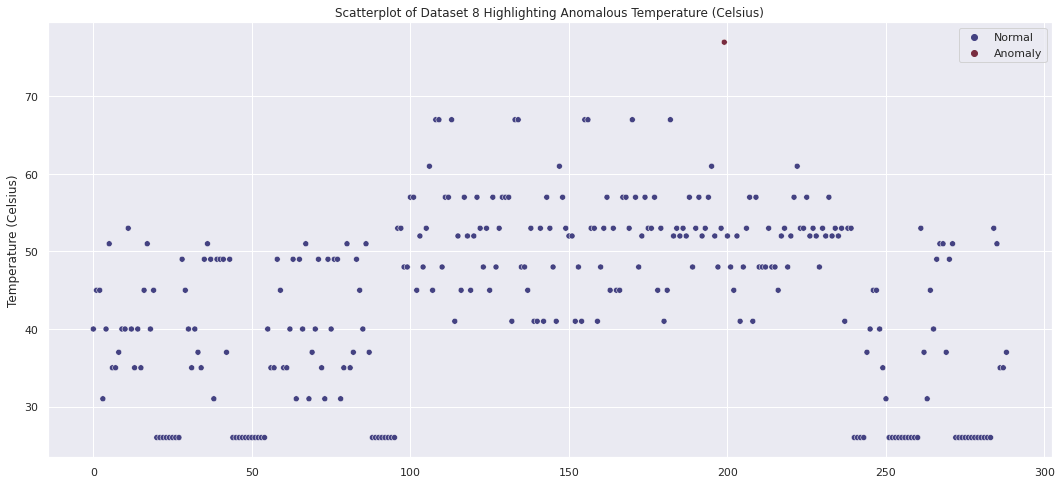

In [58]:
sns.set(rc = {'figure.figsize': (18, 8)})
sns.scatterplot(x = df_8.index,
                y = df_8['Temperature (Celsius)'].loc[0:288],
                hue = df_8['anomaly'],
                palette = "icefire")
plt.title("Scatterplot of Dataset 8 Highlighting Anomalous Temperature (Celsius)")
L = plt.legend(bbox_to_anchor = (1, 1))
L.get_texts()[1].set_text('Anomaly')
L.get_texts()[0].set_text('Normal')
plt.show()

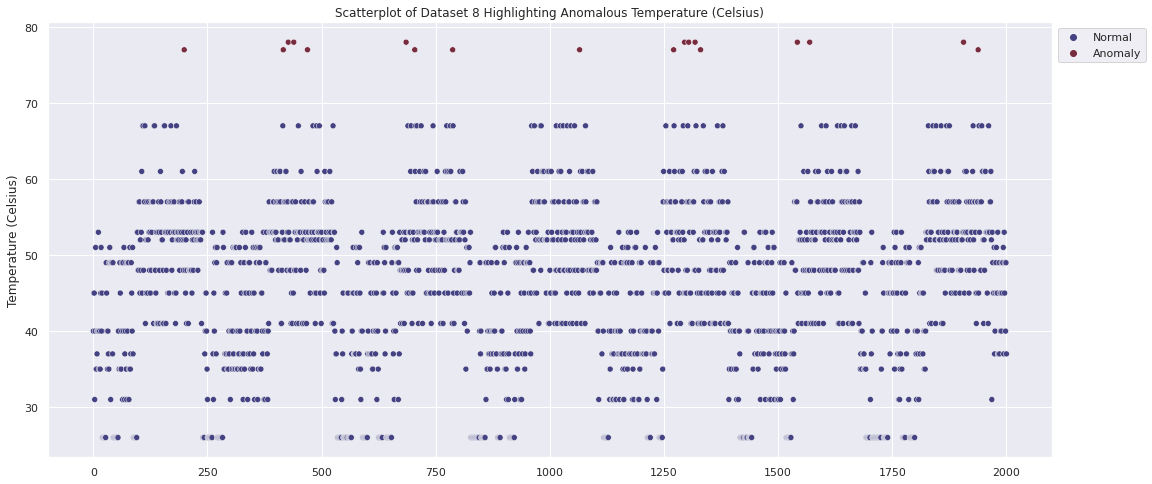

In [59]:
sns.set(rc = {'figure.figsize': (18, 8)})
sns.scatterplot(x = df_8.index,
                y = df_8['Temperature (Celsius)'].loc[0:2000],
                hue = df_8['anomaly'],
                palette = "icefire")
plt.title("Scatterplot of Dataset 8 Highlighting Anomalous Temperature (Celsius)")
L = plt.legend(bbox_to_anchor = (1, 1))
L.get_texts()[1].set_text('Anomaly')
L.get_texts()[0].set_text('Normal')
plt.show()

**Patterns of Failure Analysis**

Number of Anomalies Grouped by Day of Week

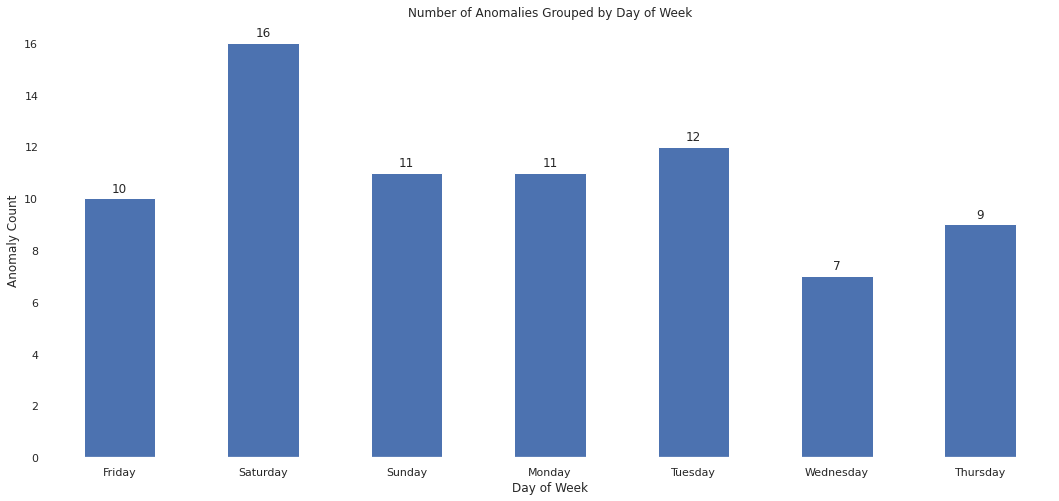

In [60]:
ax = df_8[df_8['anomaly'] == 1].groupby('day_of_week', sort=False)['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Day of Week')
plt.ylabel('Anomaly Count')
plt.xlabel('Day of Week')
plt.show()

Number of Anomalies Grouped by Hour

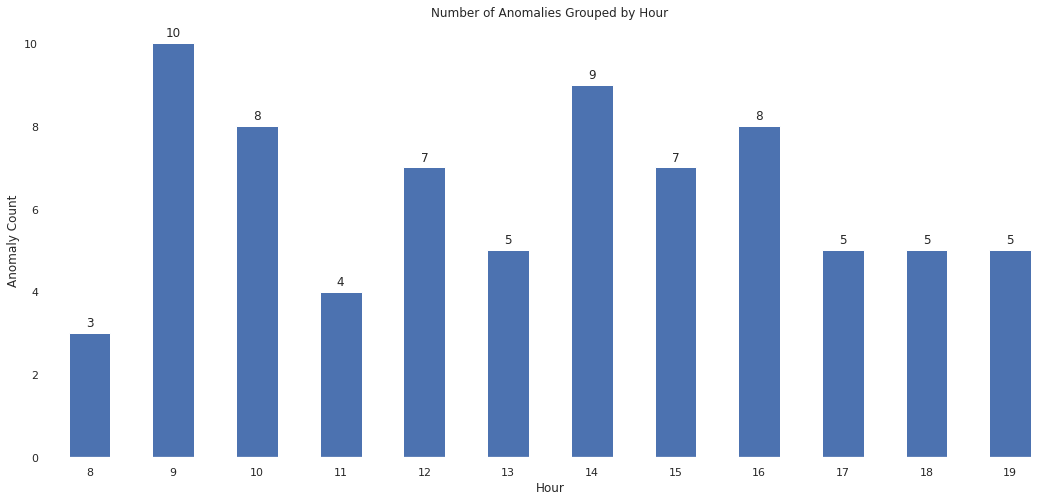

In [61]:
ax = df_8[df_8['anomaly'] == 1].groupby('hour')['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Hour')
plt.ylabel('Anomaly Count')
plt.xlabel('Hour')
plt.show()

Number of Anomalies Grouped by Minute

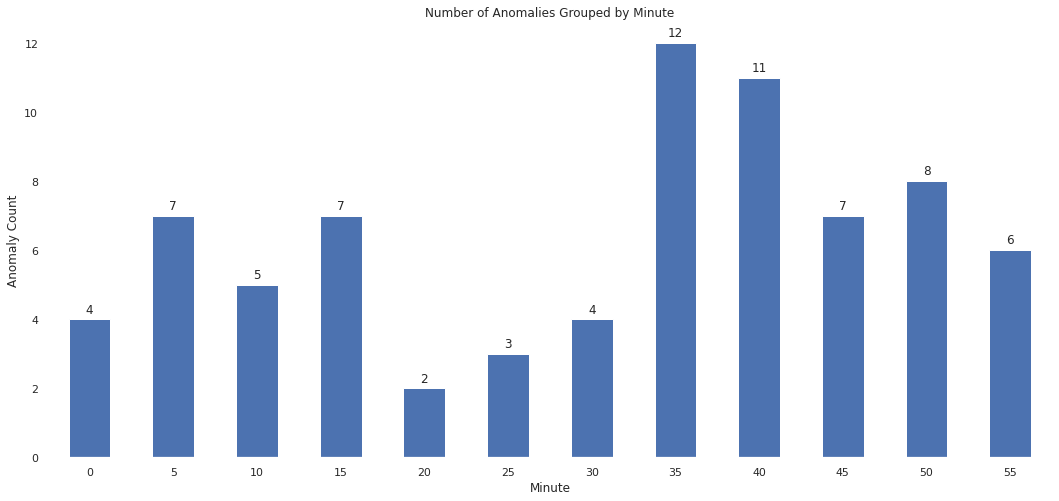

In [62]:
ax = df_8[df_8['anomaly'] == 1].groupby('minute')['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Minute')
plt.ylabel('Anomaly Count')
plt.xlabel('Minute')
plt.show()

## Dataset 9

**Descriptive Statistics**

In [63]:
df_9.describe().iloc[:, 0:3]

,Temperature (Celsius),scores,anomaly
count,8928.000000,8928.000000,8928.000000
mean,45.605623,-0.008984,0.010417
std,11.947893,0.051823,0.101535
min,26.000000,-0.279157,0.000000
25%,37.000000,-0.031278,0.000000
50%,48.000000,-0.003345,0.000000
75%,55.000000,0.023603,0.000000
max,78.000000,0.052482,1.000000


**Distribution Plot**

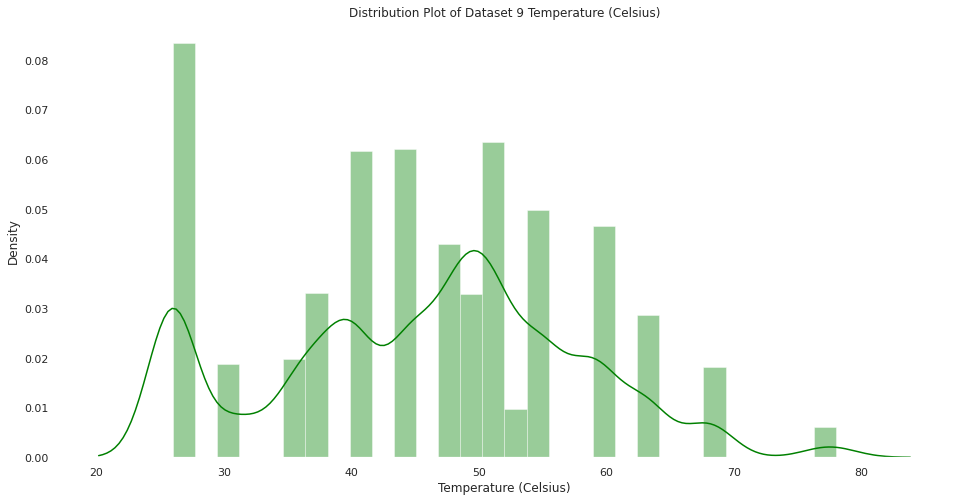

In [64]:
sns.set(rc = {"figure.figsize": (16, 8), 'axes.facecolor': 'white'})
sns.distplot(x = df_9["Temperature (Celsius)"], color = 'Green').set_title("Distribution Plot of Dataset 9 Temperature (Celsius)")
plt.xlabel('Temperature (Celsius)')
plt.show()

**Scatterplot Visualization**

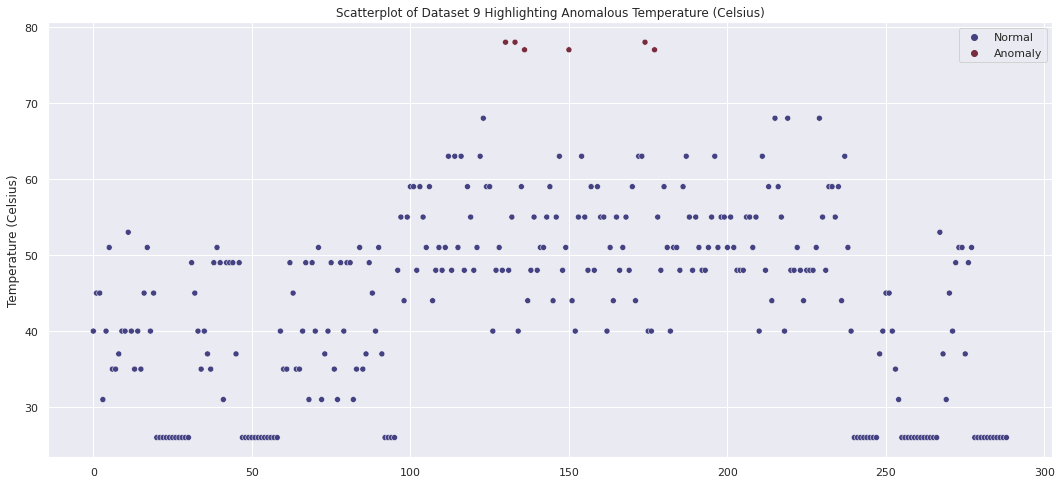

In [65]:
sns.set(rc = {'figure.figsize': (18, 8)})
sns.scatterplot(x = df_9.index,
                y = df_9['Temperature (Celsius)'].loc[0:288],
                hue = df_9['anomaly'],
                palette = "icefire")
plt.title("Scatterplot of Dataset 9 Highlighting Anomalous Temperature (Celsius)")
L = plt.legend(bbox_to_anchor = (1, 1))
L.get_texts()[1].set_text('Anomaly')
L.get_texts()[0].set_text('Normal')
plt.show()

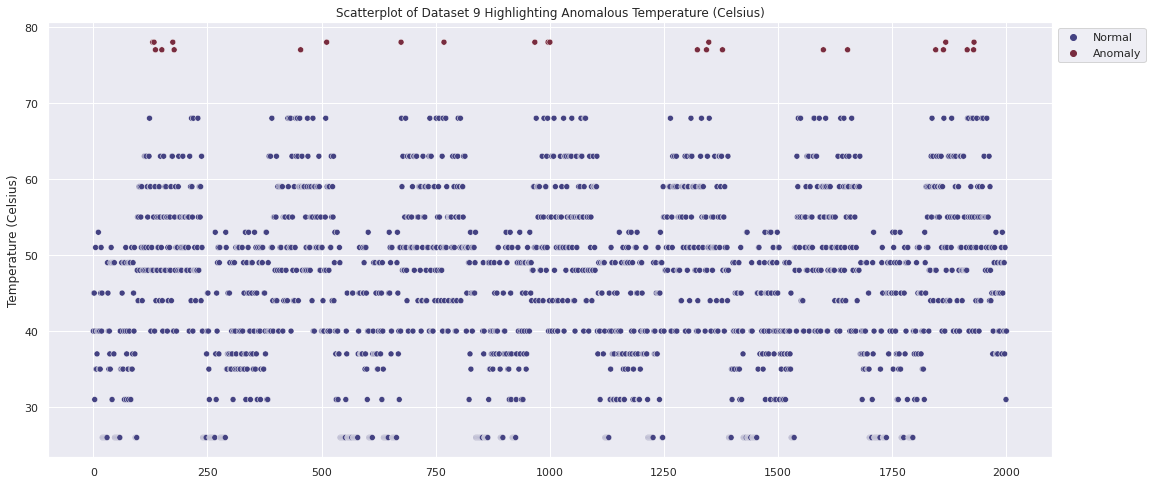

In [66]:
sns.set(rc = {'figure.figsize': (18, 8)})
sns.scatterplot(x = df_9.index,
                y = df_9['Temperature (Celsius)'].loc[0:2000],
                hue = df_9['anomaly'],
                palette = "icefire")
plt.title("Scatterplot of Dataset 9 Highlighting Anomalous Temperature (Celsius)")
L = plt.legend(bbox_to_anchor = (1, 1))
L.get_texts()[1].set_text('Anomaly')
L.get_texts()[0].set_text('Normal')
plt.show()

**Patterns of Failure Analysis**

Number of Anomalies Grouped by Day of Week

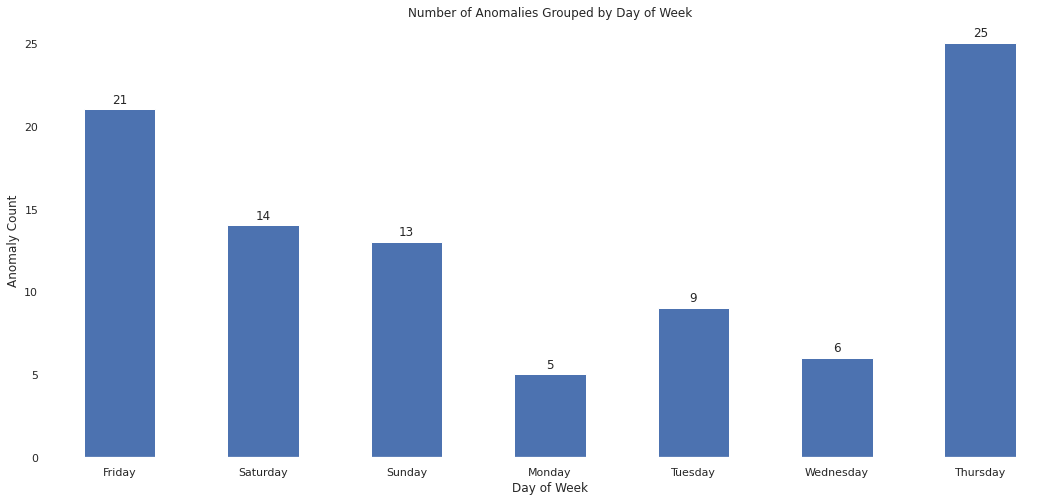

In [67]:
ax = df_9[df_9['anomaly'] == 1].groupby('day_of_week', sort=False)['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Day of Week')
plt.ylabel('Anomaly Count')
plt.xlabel('Day of Week')
plt.show()

Number of Anomalies Grouped by Hour

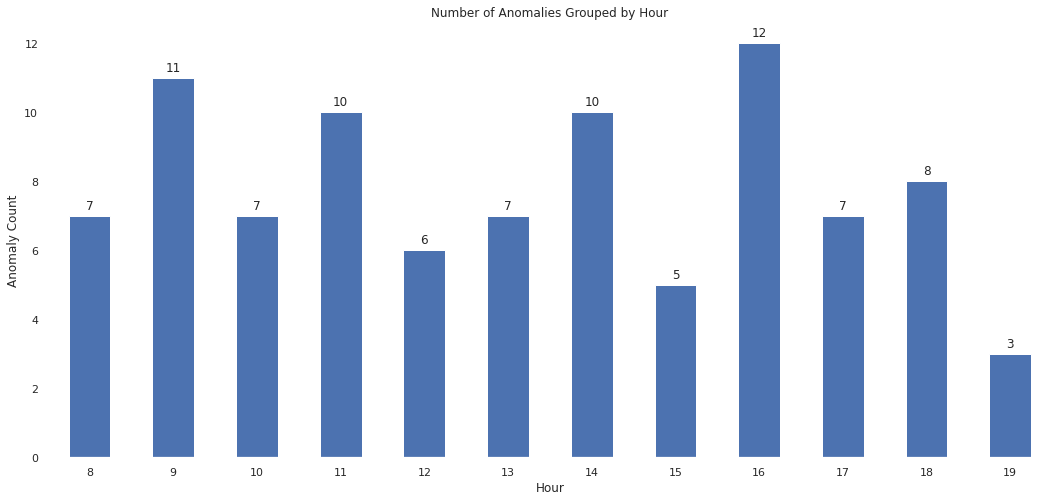

In [68]:
ax = df_9[df_9['anomaly'] == 1].groupby('hour')['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Hour')
plt.ylabel('Anomaly Count')
plt.xlabel('Hour')
plt.show()

Number of Anomalies Grouped by Minute

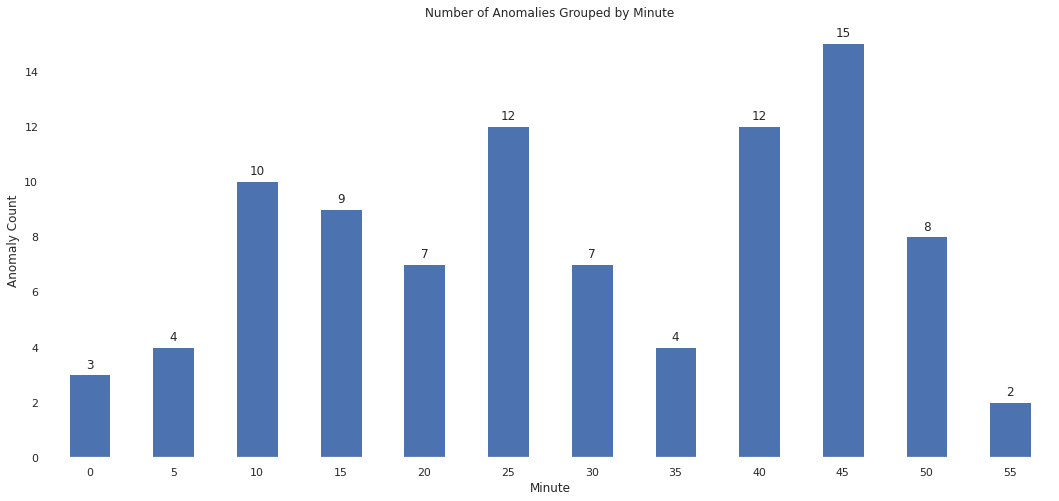

In [69]:
ax = df_9[df_9['anomaly'] == 1].groupby('minute')['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Minute')
plt.ylabel('Anomaly Count')
plt.xlabel('Minute')
plt.show()

## Dataset 10

**Descriptive Statistics**

In [70]:
df_10.describe().iloc[:, 0:3]

,Temperature (Celsius),scores,anomaly
count,8928.000000,8928.000000,8928.000000
mean,45.337814,-0.009061,0.009297
std,11.654193,0.049655,0.095975
min,26.000000,-0.274830,0.000000
25%,37.000000,-0.032879,0.000000
50%,48.000000,0.000326,0.000000
75%,54.000000,0.021950,0.000000
max,77.000000,0.052476,1.000000


**Distribution Plot**

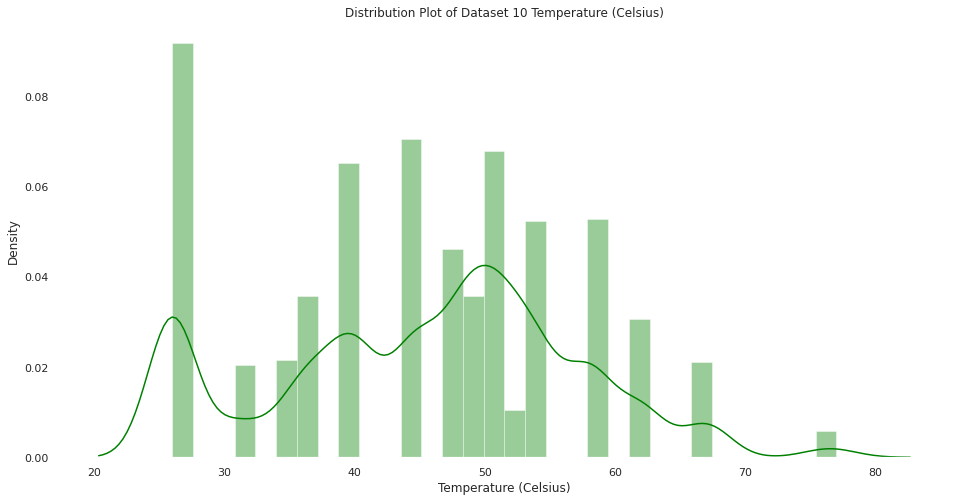

In [71]:
sns.set(rc = {"figure.figsize": (16, 8), 'axes.facecolor': 'white'})
sns.distplot(x = df_10["Temperature (Celsius)"], color = 'Green').set_title("Distribution Plot of Dataset 10 Temperature (Celsius)")
plt.xlabel('Temperature (Celsius)')
plt.show()

**Scatterplot Visualization**

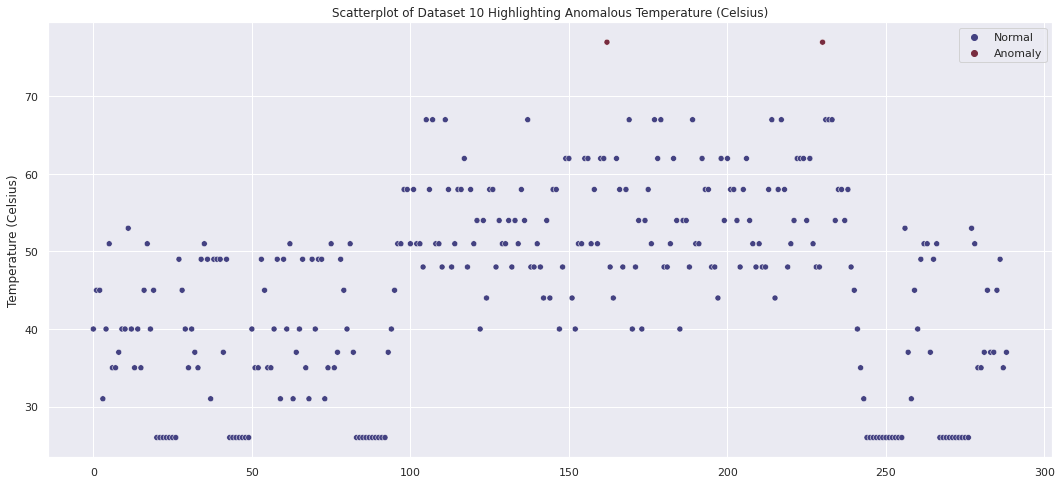

In [72]:
sns.set(rc = {'figure.figsize': (18, 8)})
sns.scatterplot(x = df_10.index,
                y = df_10['Temperature (Celsius)'].loc[0:288],
                hue = df_10['anomaly'],
                palette = "icefire")
plt.title("Scatterplot of Dataset 10 Highlighting Anomalous Temperature (Celsius)")
L = plt.legend(bbox_to_anchor = (1, 1))
L.get_texts()[1].set_text('Anomaly')
L.get_texts()[0].set_text('Normal')
plt.show()

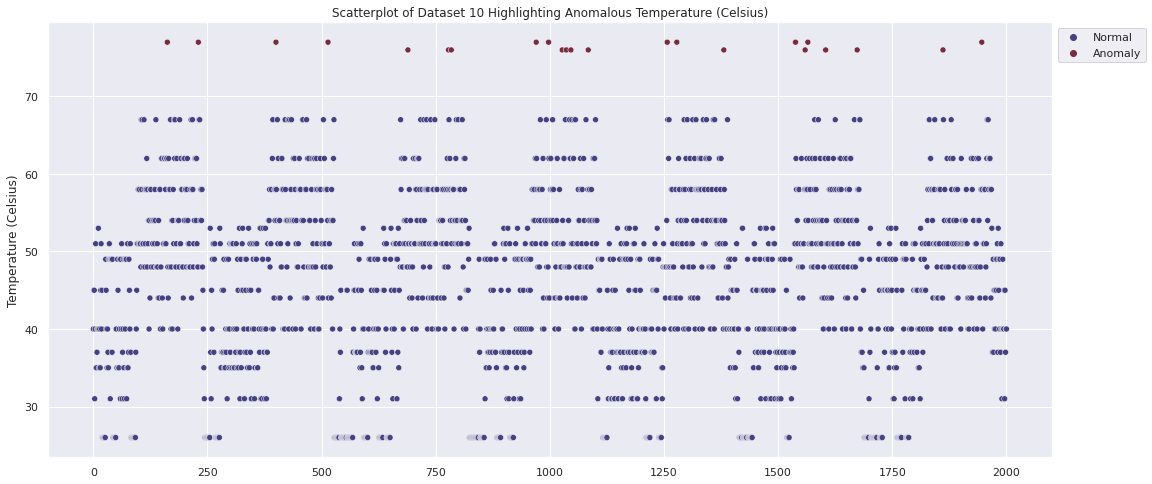

In [73]:
sns.set(rc = {'figure.figsize': (18, 8)})
sns.scatterplot(x = df_10.index,
                y = df_10['Temperature (Celsius)'].loc[0:2000],
                hue = df_10['anomaly'],
                palette = "icefire")
plt.title("Scatterplot of Dataset 10 Highlighting Anomalous Temperature (Celsius)")
L = plt.legend(bbox_to_anchor = (1, 1))
L.get_texts()[1].set_text('Anomaly')
L.get_texts()[0].set_text('Normal')
plt.show()

**Patterns of Failure Analysis**

Number of Anomalies Grouped by Day of Week

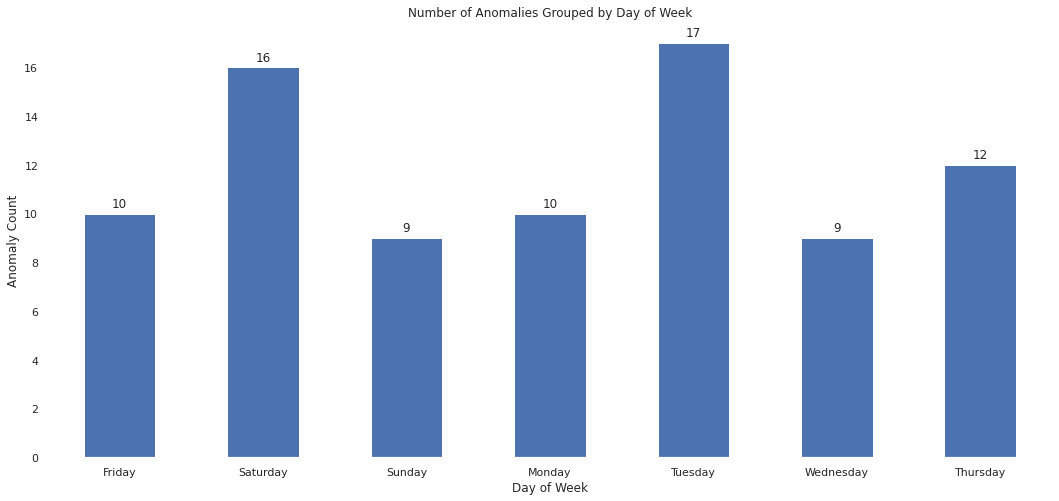

In [74]:
ax = df_10[df_10['anomaly'] == 1].groupby('day_of_week', sort=False)['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Day of Week')
plt.ylabel('Anomaly Count')
plt.xlabel('Day of Week')
plt.show()

Number of Anomalies Grouped by Hour

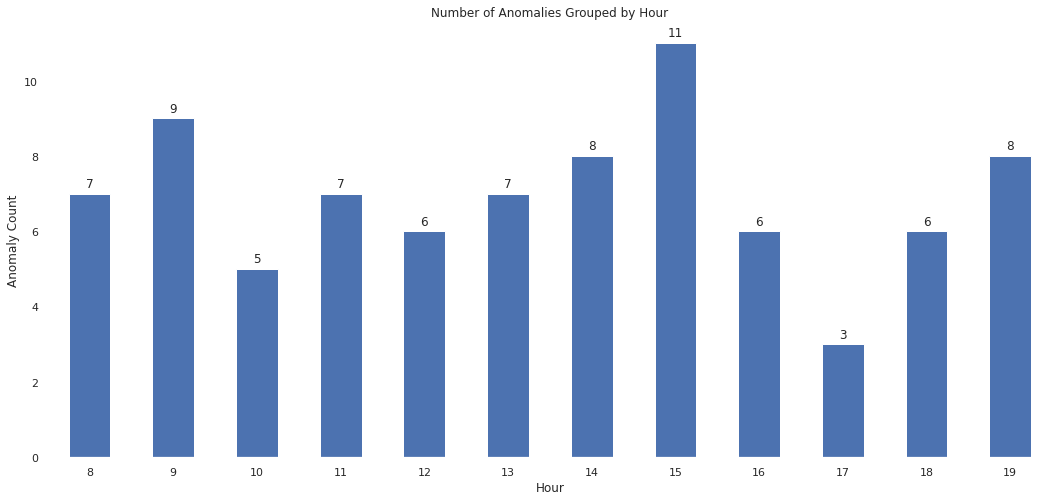

In [75]:
ax = df_10[df_10['anomaly'] == 1].groupby('hour')['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Hour')
plt.ylabel('Anomaly Count')
plt.xlabel('Hour')
plt.show()

Number of Anomalies Grouped by Minute

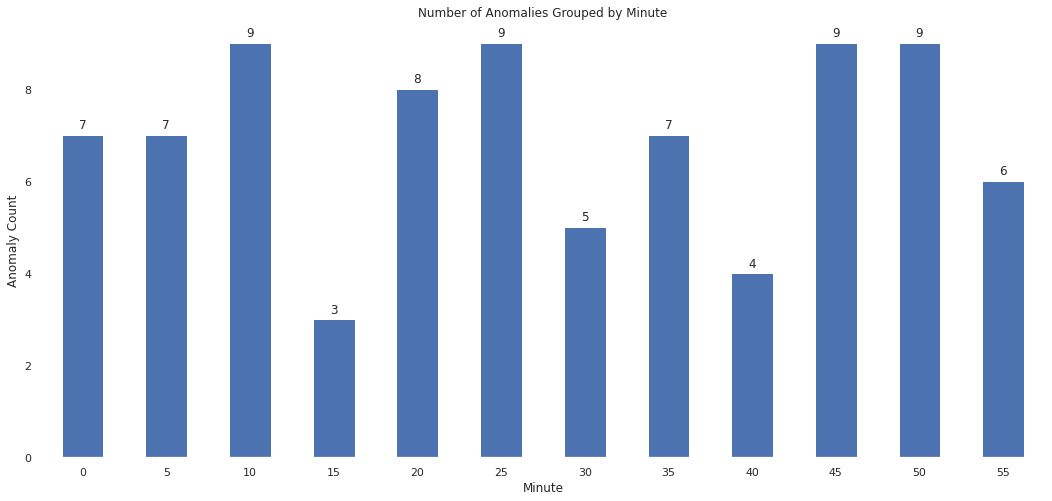

In [76]:
ax = df_10[df_10['anomaly'] == 1].groupby('minute')['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Minute')
plt.ylabel('Anomaly Count')
plt.xlabel('Minute')
plt.show()

**Anomaly Count of all Assets for Temperature (Celsius)**

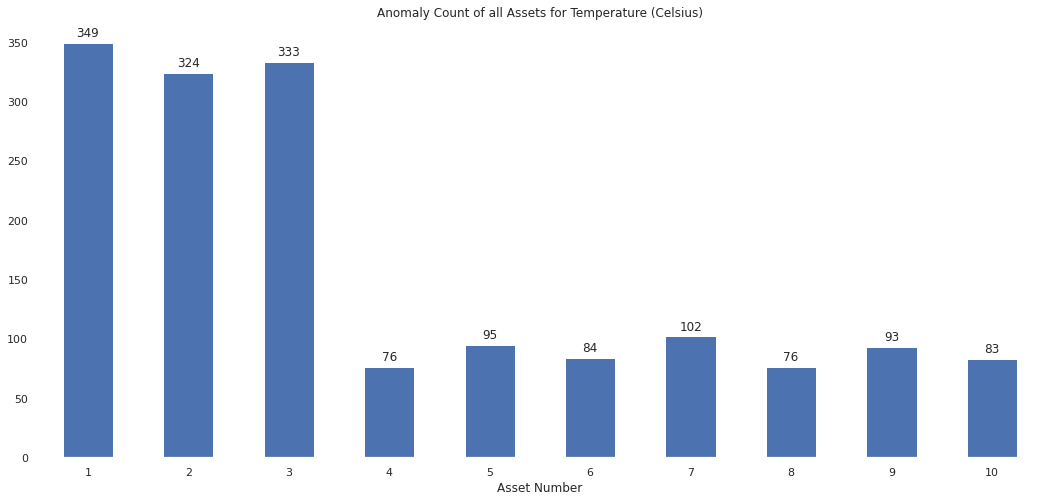

In [77]:
list_asset = [i + 1 for i in range(10)]
data1 = df_1[df_1['anomaly'] == 1]["anomaly"].count()
data2 = df_2[df_2['anomaly'] == 1]["anomaly"].count()
data3 = df_3[df_3['anomaly'] == 1]["anomaly"].count()
data4 = df_4[df_4['anomaly'] == 1]["anomaly"].count()
data5 = df_5[df_5['anomaly'] == 1]["anomaly"].count()
data6 = df_6[df_6['anomaly'] == 1]["anomaly"].count()
data7 = df_7[df_7['anomaly'] == 1]["anomaly"].count()
data8 = df_8[df_8['anomaly'] == 1]["anomaly"].count()
data9 = df_9[df_9['anomaly'] == 1]["anomaly"].count()
data10 = df_10[df_10['anomaly'] == 1]["anomaly"].count()
data = [data1, data2, data3, data4, data5, data6, data7, data8, data9, data10]
df = pd.DataFrame(list(zip(list_asset, data)), 
                  columns = ["Asset Number", "Anomaly Count"])
ax = df.plot(kind = 'bar', 
             x = "Asset Number", 
             y = "Anomaly Count",
             rot = 0,
             legend = False)
ax.set_facecolor('white')
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
plt.title("Anomaly Count of all Assets for Temperature (Celsius)")
plt.show()

**Daily Anomaly Count**

Asset 1

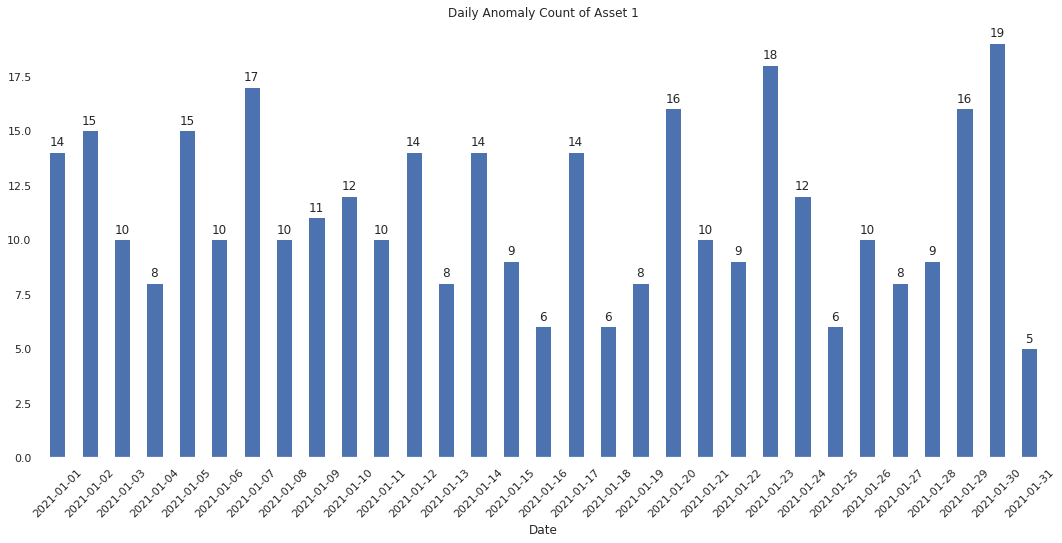

In [78]:
ax = df_1[df_1['anomaly'] == 1].groupby(df_1["Timestamp"].dt.date, sort=False)['anomaly'].count().plot(kind='bar', rot=45)
plt.xlabel("Date")
plt.title("Daily Anomaly Count of Asset 1")
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.show()

Asset 2

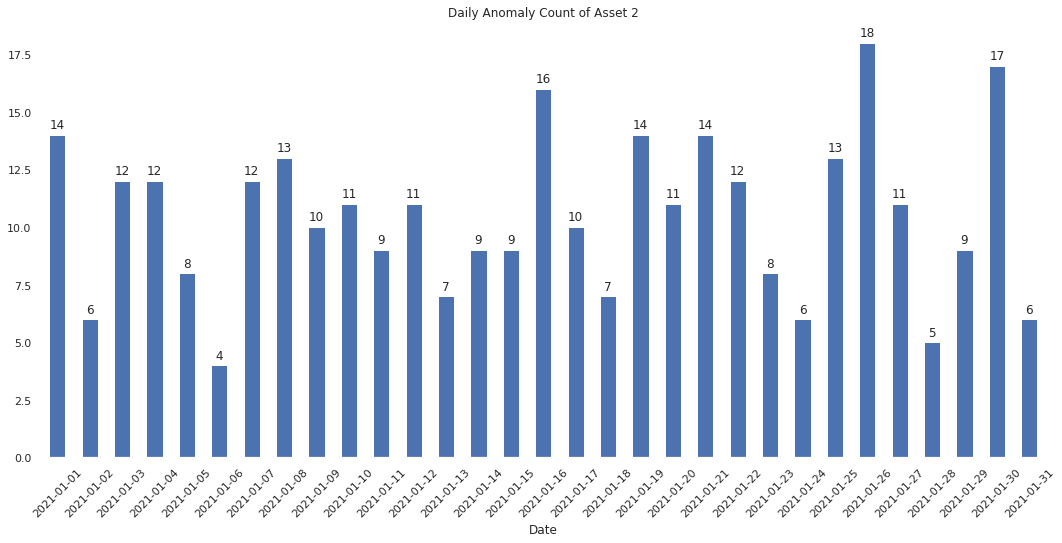

In [79]:
ax = df_2[df_2['anomaly'] == 1].groupby(df_2["Timestamp"].dt.date, sort=False)['anomaly'].count().plot(kind='bar', rot=45)
plt.xlabel("Date")
plt.title("Daily Anomaly Count of Asset 2")
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.show()

Asset 3

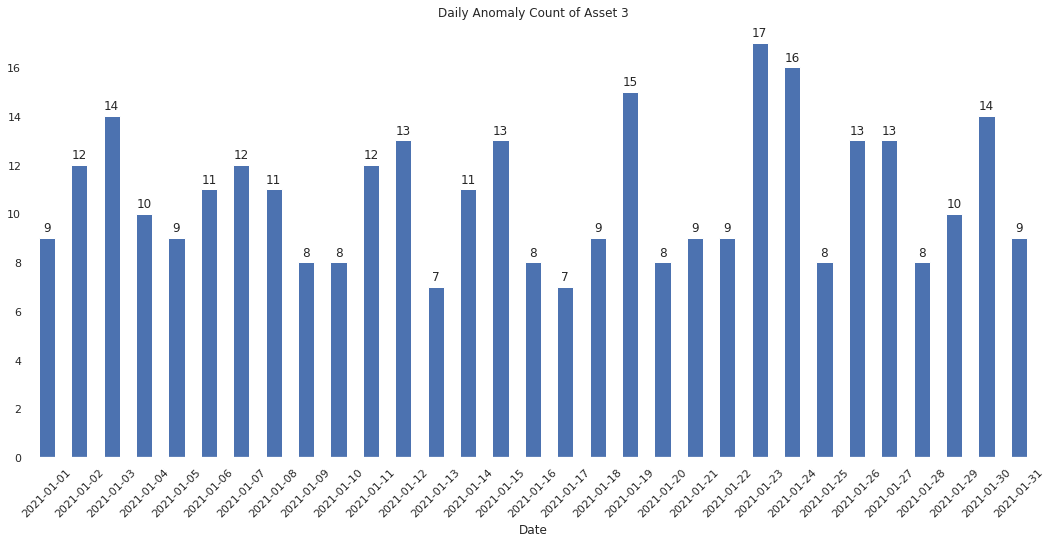

In [80]:
ax = df_3[df_3['anomaly'] == 1].groupby(df_3["Timestamp"].dt.date, sort=False)['anomaly'].count().plot(kind='bar', rot=45)
plt.xlabel("Date")
plt.title("Daily Anomaly Count of Asset 3")
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.show()

Asset 4

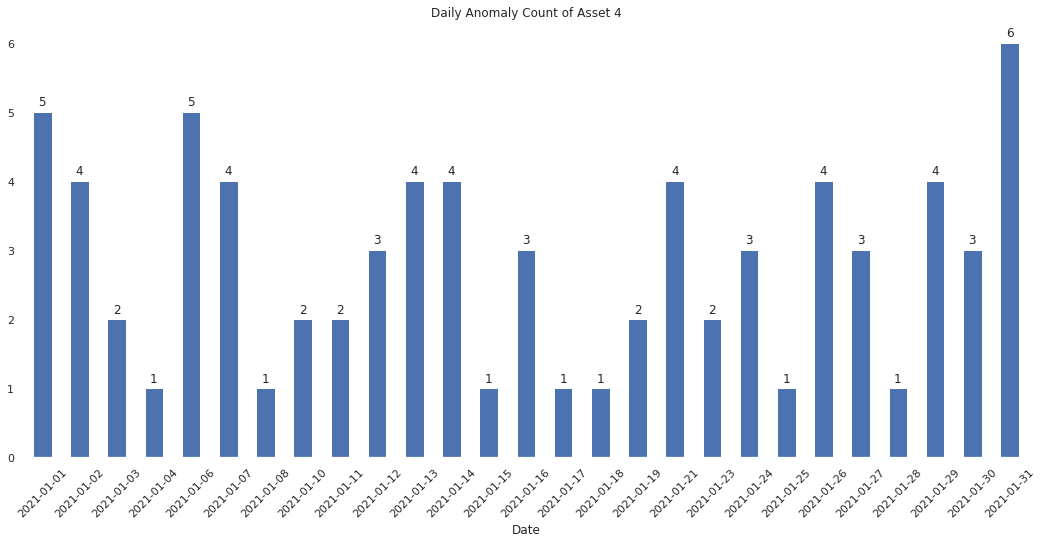

In [81]:
ax = df_4[df_4['anomaly'] == 1].groupby(df_4["Timestamp"].dt.date, sort=False)['anomaly'].count().plot(kind='bar', rot=45)
plt.xlabel("Date")
plt.title("Daily Anomaly Count of Asset 4")
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.show()

Asset 5

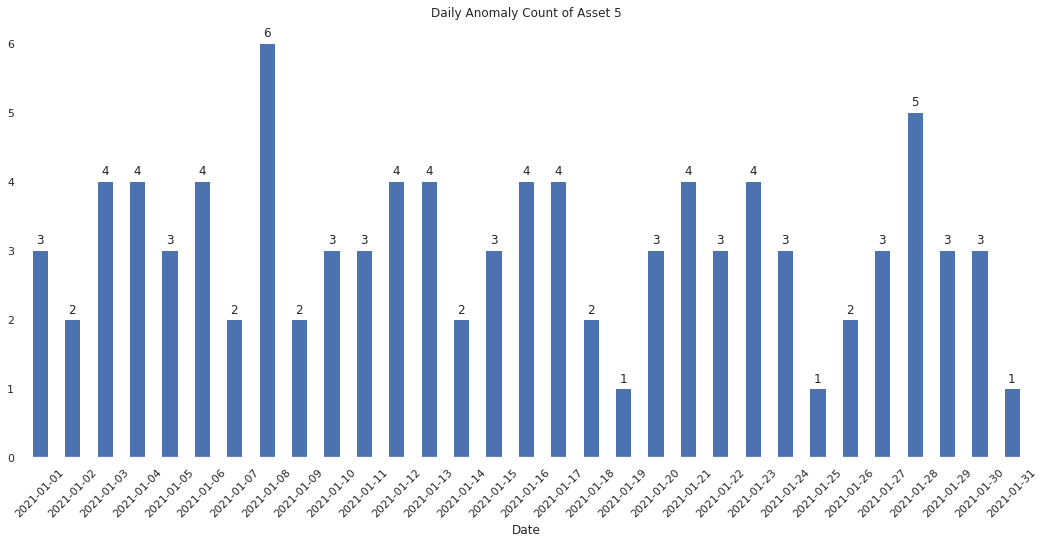

In [82]:
ax = df_5[df_5['anomaly'] == 1].groupby(df_5["Timestamp"].dt.date, sort=False)['anomaly'].count().plot(kind='bar', rot=45)
plt.xlabel("Date")
plt.title("Daily Anomaly Count of Asset 5")
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.show()

Asset 6

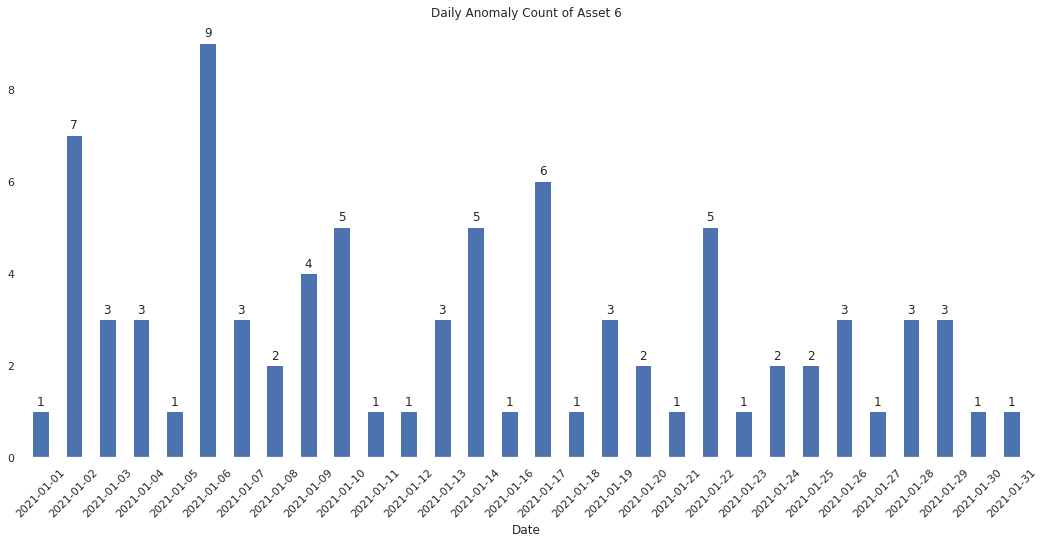

In [83]:
ax = df_6[df_6['anomaly'] == 1].groupby(df_6["Timestamp"].dt.date, sort=False)['anomaly'].count().plot(kind='bar', rot=45)
plt.xlabel("Date")
plt.title("Daily Anomaly Count of Asset 6")
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.show()

Asset 7

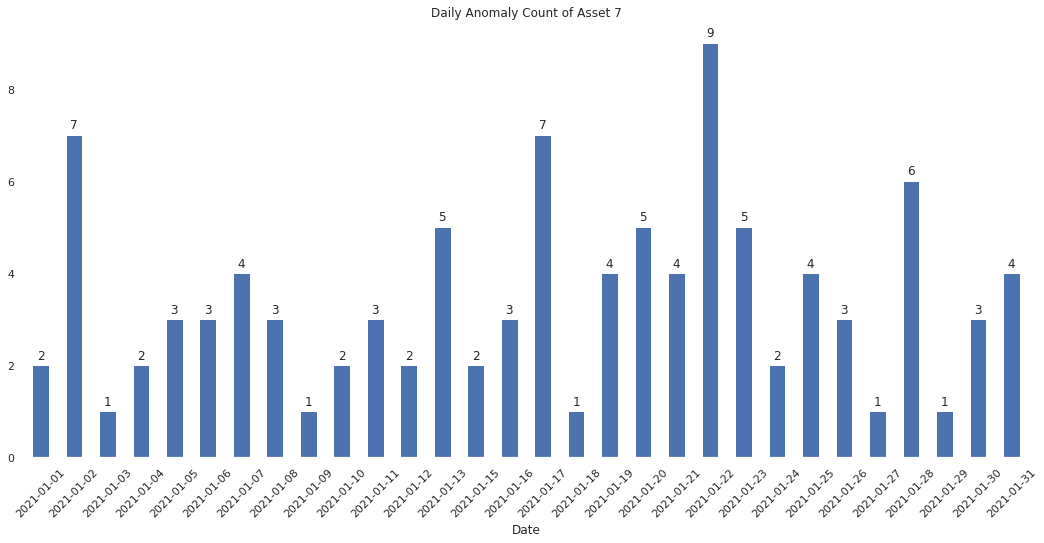

In [84]:
ax = df_7[df_7['anomaly'] == 1].groupby(df_7["Timestamp"].dt.date, sort=False)['anomaly'].count().plot(kind='bar', rot=45)
plt.xlabel("Date")
plt.title("Daily Anomaly Count of Asset 7")
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.show()

Asset 8

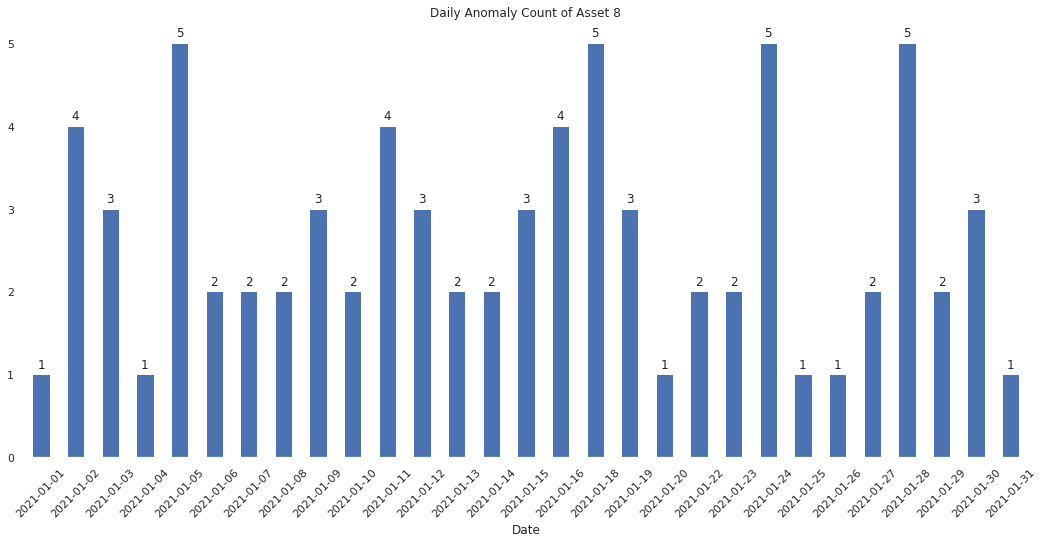

In [85]:
ax = df_8[df_8['anomaly'] == 1].groupby(df_8["Timestamp"].dt.date, sort=False)['anomaly'].count().plot(kind='bar', rot=45)
plt.xlabel("Date")
plt.title("Daily Anomaly Count of Asset 8")
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.show()

Asset 9

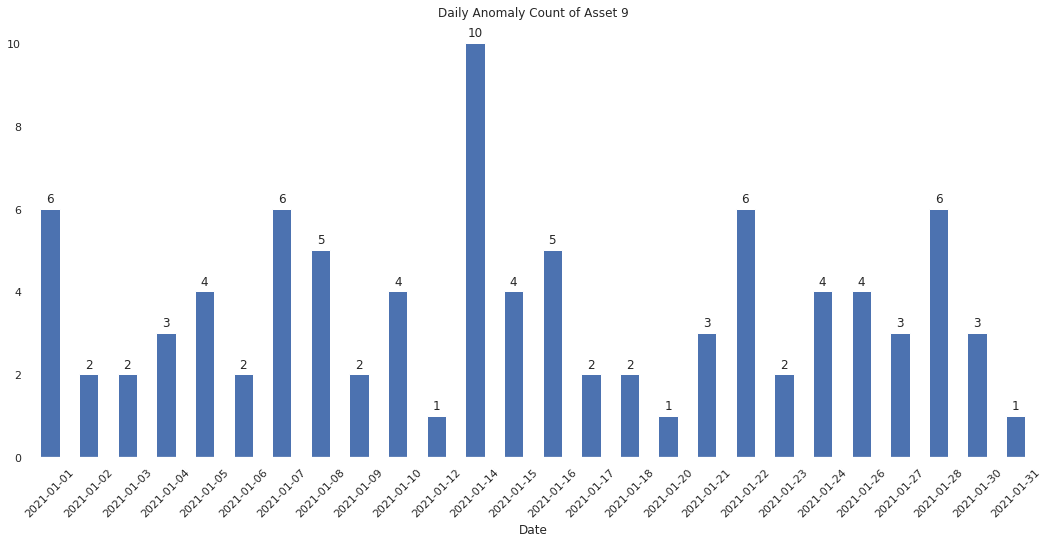

In [86]:
ax = df_9[df_9['anomaly'] == 1].groupby(df_9["Timestamp"].dt.date, sort=False)['anomaly'].count().plot(kind='bar', rot=45)
plt.xlabel("Date")
plt.title("Daily Anomaly Count of Asset 9")
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.show()

Asset 10

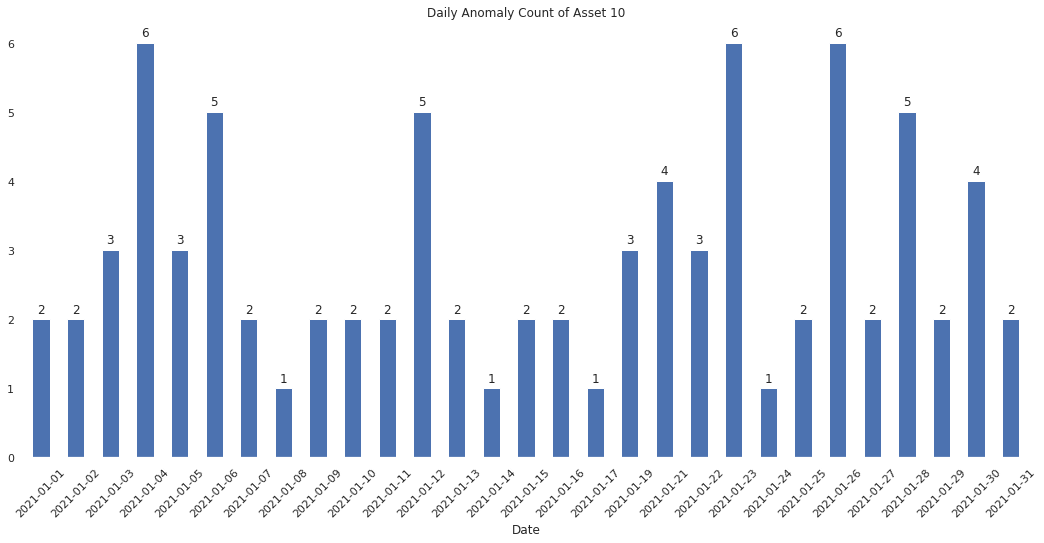

In [87]:
ax = df_10[df_10['anomaly'] == 1].groupby(df_10["Timestamp"].dt.date, sort=False)['anomaly'].count().plot(kind='bar', rot=45)
plt.xlabel("Date")
plt.title("Daily Anomaly Count of Asset 10")
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.show()